<a href="https://colab.research.google.com/github/NuoWenLei/AAPI-text-analysis-project/blob/main/notebooks/ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6/29/2021 Cells (Get outlet data)

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from bs4 import BeautifulSoup

In [ ]:
with open('/content/gdrive/MyDrive/AAPI_text_analysis_project/news_rating.html', 'r') as news_page:
  html_txt = news_page.read()

In [ ]:
soup = BeautifulSoup(html_txt, 'html.parser')

In [ ]:
news_outlets = []
for i, tr in enumerate(soup.find_all('tr')):
  outlet = {}
  if i % 50 == 0:
    print(i)
  try:
    tds = tr.find_all('td')
    outlet['link'] = tds[0].find_all('a')[0]['href']
    outlet['name'] = tds[0].find_all('a')[0].text.split('(')[0].strip().replace(' ', '_').lower()
    outlet['position'] = tds[1].find_all('img')[0]['alt'].split(':')[1].strip()
    news_outlets.append(outlet)
  except Exception as e:
    print(str(e))

0
list index out of range
50
100
150
200
250
300
350
400


In [ ]:
news_outlets[100]

{'link': '/news-source/education-week',
 'name': 'education_week',
 'position': 'Center'}

In [ ]:
import json, requests, ssl

ssl_context = ssl.SSLContext(ssl.PROTOCOL_TLS)
ssl_context.verify_mode = ssl.CERT_REQUIRED
ssl_context.check_hostname = True
ssl_context.load_default_certs()


In [ ]:
r = requests.get("https://newsapi.ai/api/v1/suggestSourcesFast?prefix=abc_news&lang=eng&apiKey=<API_KEY>&callback=JSON_CALLBACK", verify = False)


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [ ]:
json.loads(r.text.lstrip('JSON_CALLBACK').strip('(').strip(')'))

[{'dataType': 'news',
  'score': 355101,
  'title': 'ABC News',
  'uri': 'abcnews.go.com'},
 {'dataType': 'news',
  'score': 47068,
  'title': 'ABC News Radio',
  'uri': 'abcnewsradioonline.com'},
 {'dataType': 'news',
  'score': 20143,
  'title': 'Abc News',
  'uri': 'abcnews.al'},
 {'dataType': 'news',
  'score': 19650,
  'title': 'ABC 6 NEWS',
  'uri': 'kaaltv.com'},
 {'dataType': 'news',
  'score': 17711,
  'title': 'NEWS10 ABC',
  'uri': 'news10.com'},
 {'dataType': 'news',
  'score': 86,
  'title': 'ABC 14 News',
  'uri': 'abc14news.com'},
 {'dataType': 'news', 'score': 82, 'title': 'ABC 36 News', 'uri': 'wtvq.com'}]

In [ ]:
requests.__version__

'2.23.0'

In [ ]:
official_outlets = []
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

for i, outlet in enumerate(news_outlets):
  if i % 50 == 0:
    print(i)
    print(outlet)
  query_url = f"https://newsapi.ai/api/v1/suggestSourcesFast?prefix={outlet['name']}&lang=eng&apiKey=<API_KEY>&callback=JSON_CALLBACK"
  r = requests.get(query_url, verify = False)
  possible_outlets = json.loads(r.text.lstrip('JSON_CALLBACK').strip('(').strip(')'))
  if len(possible_outlets) == 0:
    continue
  official_outlets.append([possible_outlets[0], outlet])

0
{'link': '/news-source/abc-news-media-bias', 'name': 'abc_news', 'position': 'Lean Left'}
50
{'link': '/news-source/center-public-integrity', 'name': 'center_for_public_integrity', 'position': 'Lean Left'}
100
{'link': '/news-source/education-week', 'name': 'education_week', 'position': 'Center'}
150
{'link': '/news-source/inland-valley-daily-bulletin-media-bias', 'name': 'inland_valley_daily_bulletin', 'position': 'Center'}
200
{'link': '/news-source/michigan-daily', 'name': 'michigan_daily', 'position': 'Lean Left'}
250
{'link': '/news-source/politico-media-bias', 'name': 'politico', 'position': 'Lean Left'}
300
{'link': '/news-source/socialist-projectthe-bullet', 'name': 'socialist_project/the_bullet', 'position': 'Left'}
350
{'link': '/news-source/hill-media-bias', 'name': 'the_hill', 'position': 'Center'}
400
{'link': '/news-source/trainscom-media-bias', 'name': 'trains.com', 'position': 'Center'}


In [ ]:
len(official_outlets)

325

In [ ]:
with open('/content/gdrive/MyDrive/AAPI_text_analysis_project/official_outlets.json', 'w') as official_json:
  json.dump(official_outlets, official_json)

# 6/30/2021 Cells (Get Articles)

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import json

In [ ]:
with open("/content/gdrive/MyDrive/AAPI_text_analysis_project/official_outlets.json", "r") as outlets_json:
  outlets = json.load(outlets_json)

In [ ]:
outlets[0]

[{'dataType': 'news',
  'score': 355101,
  'title': 'ABC News',
  'uri': 'abcnews.go.com'},
 {'link': '/news-source/abc-news-media-bias',
  'name': 'abc_news',
  'position': 'Lean Left'}]

In [ ]:
newsapi_outlet_data = []
scraped_outlet_data = []
for n, s in outlets:
  newsapi_outlet_data.append(n)
  scraped_outlet_data.append(s)

In [ ]:
import pandas as pd, numpy as np

In [ ]:
api_df = pd.DataFrame(newsapi_outlet_data)
scraped_df = pd.DataFrame(scraped_outlet_data)


In [ ]:
full_df = api_df.join(scraped_df)

In [ ]:
full_df.head()

,score,dataType,uri,title,link,name,position
0,355101,news,abcnews.go.com,ABC News,/news-source/abc-news-media-bias,abc_news,Lean Left
1,12871,news,abovethelaw.com,Above the Law,/news-source/above-law-media-bias,above_the_law,Lean Left
2,676315,news,aa.com.tr,Anadolu Ajansı,/news-source/aj-media-bias,aj+,Left
3,63628,news,aljazeera.com,Al Jazeera Online,/news-source/al-jazeera-media-bias,al_jazeera,Lean Left
4,41349,news,alternet.org,Alternet.org,/news-source/alternet-media-bias,alternet,Left


In [ ]:
filtered_data = []
uri_namespace = []
for i, row in full_df.iterrows():
  if row['uri'] in uri_namespace:
    print(row['uri'])
    continue
  filtered_data.append(row)
  uri_namespace.append(row['uri'])
filtered_df = pd.DataFrame(filtered_data, columns = full_df.columns)
filtered_df.head()

cnnturk.com
foxnews.com
nypost.com
nytimes.com
npr.org
commercialappeal.com
dailymail.co.uk
dispatch.com
vanityfair.com
wsj.com


,score,dataType,uri,title,link,name,position
0,355101,news,abcnews.go.com,ABC News,/news-source/abc-news-media-bias,abc_news,Lean Left
1,12871,news,abovethelaw.com,Above the Law,/news-source/above-law-media-bias,above_the_law,Lean Left
2,676315,news,aa.com.tr,Anadolu Ajansı,/news-source/aj-media-bias,aj+,Left
3,63628,news,aljazeera.com,Al Jazeera Online,/news-source/al-jazeera-media-bias,al_jazeera,Lean Left
4,41349,news,alternet.org,Alternet.org,/news-source/alternet-media-bias,alternet,Left


In [ ]:
filtered_df.shape

(315, 7)

In [ ]:
for i, row in filtered_df.iterrows():
  print(row['uri'])
  # url = f"https://newsapi.ai/api/v1/article/getArticles?query=%7B%22%24query%22%3A%7B%22%24and%22%3A%5B%7B%22%24or%22%3A%5B%7B%22keyword%22%3A%22AAPI%22%2C%22keywordLoc%22%3A%22title%22%7D%2C%7B%22keyword%22%3A%22AAPI%22%2C%22keywordLoc%22%3A%22body%22%7D%5D%7D%2C%7B%22categoryUri%22%3A%22dmoz%2FSociety%2FIssues%2FRace-Ethnic-Religious_Relations%22%7D%2C%7B%22locationUri%22%3A%22http%3A%2F%2Fen.wikipedia.org%2Fwiki%2FUnited_States%22%7D%2C%7B%22sourceUri%22%3A%22{row['uri']}%22%7D%2C%7B%22lang%22%3A%22eng%22%7D%5D%7D%2C%22%24filter%22%3A%7B%22isDuplicate%22%3A%22skipDuplicates%22%7D%7D&dataType=news&resultType=articles&articlesSortBy=date&articlesCount=100&includeArticleSocialScore=true&includeArticleConcepts=true&includeArticleCategories=true&includeArticleLocation=true&articleBodyLen=-1&includeConceptDescription=true&includeConceptSynonyms=true&includeConceptTrendingScore=true&apiKey=<API_KEY>&callback=JSON_CALLBACK"

abcnews.go.com
abovethelaw.com
aa.com.tr
aljazeera.com
alternet.org
amgreatness.com
americanthinker.com
nwaonline.com
hosted.ap.org
atlantablackstar.com
ajc.com
statesman.com
axios.com
azcentral.com
babylonbee.com
news.bbc.co.uk
beta.financial.de
blockclubchicago.org
bloomberg.com
boingboing.net
bostonherald.com
bostonreview.net
bgdailynews.com
bridgemi.com
bustle.com
buzzfeednews.com
calmatters.org
calwatchdog.com
care2.com
news.abs-cbn.com
cbsnews.com
publicintegrity.org
checkyourfact.com
chicagodefender.com
chicago.suntimes.com
chicagotribune.com
csmonitor.com
siouxcityjournal.com
cnbc.com
cnet.com
cnnturk.com
cnnturk.com
cnsnews.com
cjr.org
columbiamissourian.com
commentarymagazine.com
commondreams.org
concordmonitor.com
cookpolitical.com
cuindependent.com
thedailybeast.com
dailybreeze.com
dailycardinal.com
urbanacitizen.com
dailykos.com
dailymail.co.uk
dailynorthwestern.com
edp24.co.uk
dailyprogress.com
dailytargum.com
defenseone.com
democracynow.org
desmoinesregister.com
deseretn

In [ ]:
outlet = {'uri':'npr.org'}
try_url = f"https://newsapi.ai/api/v1/article/getArticles?query=%7B%22%24query%22%3A%7B%22%24and%22%3A%5B%7B%22%24or%22%3A%5B%7B%22keyword%22%3A%22AAPI%22%2C%22keywordLoc%22%3A%22title%22%7D%2C%7B%22keyword%22%3A%22AAPI%22%2C%22keywordLoc%22%3A%22body%22%7D%5D%7D%2C%7B%22categoryUri%22%3A%22dmoz%2FSociety%2FIssues%2FRace-Ethnic-Religious_Relations%22%7D%2C%7B%22locationUri%22%3A%22http%3A%2F%2Fen.wikipedia.org%2Fwiki%2FUnited_States%22%7D%2C%7B%22sourceUri%22%3A%22{outlet['uri']}%22%7D%2C%7B%22lang%22%3A%22eng%22%7D%5D%7D%2C%22%24filter%22%3A%7B%22isDuplicate%22%3A%22skipDuplicates%22%7D%7D&dataType=news&resultType=articles&articlesSortBy=date&articlesCount=100&includeArticleSocialScore=true&includeArticleConcepts=true&includeArticleCategories=true&includeArticleLocation=true&articleBodyLen=-1&includeConceptDescription=true&includeConceptSynonyms=true&includeConceptTrendingScore=true&apiKey=<API_KEY>&callback=JSON_CALLBACK"

In [ ]:
r = requests.get(try_url, verify = False)

In [ ]:
r

<Response [200]>

In [ ]:
r.text

'JSON_CALLBACK({"articles":{"page":1,"totalResults":1,"pages":1,"results":[{"uri":"6518486203","lang":"eng","isDuplicate":false,"date":"2021-04-13","time":"16:48:00","dateTime":"2021-04-13T16:48:00Z","dateTimePub":"2021-04-13T16:35:00Z","dataType":"news","sim":0.7019608020782471,"url":"https://www.npr.org/2021/04/13/986749681/enough-is-enough-democrats-push-for-gop-support-on-asian-american-hate-crimes-bi","title":"\'Enough Is Enough\': Democrats Push For GOP Support On Asian American Hate Crimes Bill","body":"Hawaii Sen. Mazie Hirono, seen here at the Capitol in February, sponsored the COVID-19 Hate Crimes Act to address the rise of violence targeted at Asian Americans and Pacific Islanders.\\n\\nTop congressional Democrats are calling on their Republican colleagues to support legislation introduced by Sen. Mazie Hirono and Rep. Grace Meng that addresses the rising number of hate crimes and violence against Asian Americans.\\n\\n\\"For more than a year, the Asian American community ha

In [ ]:
import json

In [ ]:
full_texts_1 = []
full_jsons_1 = []
for i, row in filtered_df.iterrows():
  try:
    if i % 50 == 0:
      print(i)
    url = f"https://newsapi.ai/api/v1/article/getArticles?query=%7B%22%24query%22%3A%7B%22%24and%22%3A%5B%7B%22conceptUri%22%3A%22http%3A%2F%2Fen.wikipedia.org%2Fwiki%2FAsian_Americans%22%7D%2C%7B%22categoryUri%22%3A%22dmoz%2FSociety%2FIssues%2FRace-Ethnic-Religious_Relations%22%7D%2C%7B%22locationUri%22%3A%22http%3A%2F%2Fen.wikipedia.org%2Fwiki%2FUnited_States%22%7D%2C%7B%22sourceUri%22%3A%22{row['uri']}%22%7D%2C%7B%22dateStart%22%3A%222020-07-01%22%2C%22dateEnd%22%3A%222021-07-01%22%2C%22lang%22%3A%22eng%22%7D%5D%7D%7D&dataType=news&resultType=articles&articlesSortBy=date&articlesCount=100&includeArticleSocialScore=true&includeArticleConcepts=true&includeArticleCategories=true&includeArticleLocation=true&articleBodyLen=-1&includeConceptDescription=true&includeConceptSynonyms=true&includeConceptTrendingScore=true&includeSourceDescription=true&includeSourceLocation=true&includeSourceRanking=true&apiKey=<API_KEY>&callback=JSON_CALLBACK"
    r = requests.get(url, verify = False)
    full_texts_1.append(r.text)
    full_jsons_1.append(json.loads(r.text.lstrip('JSON_CALLBACK').strip('(').strip(')')))
  except Exception as e:
    print(i)
    print(e)

0
50
100
150
200
250


In [ ]:
full_jsons_1[0]

{'articles': {'page': 1,
  'pages': 1,
  'results': [{'authors': [],
    'body': 'NASHVILLE, Tenn. -- Race-related tensions within the Southern Baptist Convention are high heading into a national meeting next week. The election of a new SBC president and debate over the concept of systemic racism may prove pivotal for some Black pastors as they decide whether to stay in the denomination or leave.\n\nIt could be a watershed moment for America\'s largest Protestant denomination. The SBC was founded before the Civil War as a defender of slavery, and only in 1995 did it formally apologize for that legacy -- yet since 2000 its Black membership has been increasing while white membership declines.\n\nOver the past year, however, several Black pastors have exited the SBC in frustration over what they see as racial insensitivity within its overwhelmingly white leadership.\n\nDepending on the outcome at the meeting in Nashville, the exodus could swell -- or subside. Many Black pastors are comfor

In [ ]:
full_jsons[-1]

{'articles': {'page': 1, 'pages': 0, 'results': [], 'totalResults': 0}}

In [ ]:
all_articles = []
for obj in full_jsons:
  all_articles.extend(obj['articles']['results'])
len(all_articles)

In [ ]:
all_articles_1 = []
for obj in full_jsons_1:
  all_articles_1.extend(obj['articles']['results'])
len(all_articles_1)

507

In [ ]:
with open('/content/gdrive/MyDrive/AAPI_text_analysis_project/AAPI_specific_articles.json', 'w') as aapi_json:
  json.dump(all_articles, aapi_json)

In [ ]:
with open('/content/gdrive/MyDrive/AAPI_text_analysis_project/Asian_American_Articles_in_last_year.json', 'w') as aapi_json:
  json.dump(all_articles_1, aapi_json)

# 7/1/2021 Cells (Join Article and Outlet Data, Convert to DataFrame)

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import json, numpy as np, pandas as pd

In [ ]:
with open('/content/gdrive/MyDrive/AAPI_text_analysis_project/Asian_American_Articles_in_last_year.json', 'r') as aapi_json:
  articles = json.load(aapi_json)

In [ ]:
articles[0].keys()

dict_keys(['uri', 'lang', 'isDuplicate', 'date', 'time', 'dateTime', 'dateTimePub', 'dataType', 'sim', 'url', 'title', 'body', 'source', 'authors', 'concepts', 'categories', 'image', 'eventUri', 'location', 'shares', 'sentiment', 'wgt', 'relevance'])

In [ ]:
articles[0]['concepts'][0]

{'label': {'eng': 'Black church'},
 'score': 5,
 'synonyms': {},
 'trendingScore': {'news': {'nullPopFq': 0, 'score': 0, 'testPopFq': 0}},
 'type': 'person',
 'uri': 'http://en.wikipedia.org/wiki/Black_church'}

In [ ]:
# Get all concepts appeared
all_concept_names = []
all_concepts = []
for i, article in enumerate(articles):
  for c in article['concepts']:
    obj = {}
    obj['label'] = c['label']['eng']
    if obj['label'] in all_concept_names:
      continue
    obj['score'] = c['score']
    obj['type'] = c['type']
    obj['uri'] = c['uri']
    all_concept_names.append(obj['label'])
    all_concepts.append(obj)
len(all_concept_names)

2704

In [ ]:
# Get all concepts appeared
all_cat_uri = []
for i, article in enumerate(articles):
  for c in article['categories']:
    if c['uri'] in all_cat_uri:
      continue
    all_cat_uri.append(c['uri'])
len(all_cat_uri)

144

In [ ]:
with open('/content/gdrive/MyDrive/AAPI_text_analysis_project/unique_article_concepts.json', 'w') as unique_json:
  json.dump(all_concepts, unique_json)

In [ ]:
with open('/content/gdrive/MyDrive/AAPI_text_analysis_project/unique_article_categories.json', 'w') as unique_json:
  json.dump(all_cat_uri, unique_json)

In [ ]:
import nltk

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
article_data = []
tokenized_articles = []
concept_frequency_dict = dict((n, 0) for n in all_concept_names)
category_frequency_dict = dict((n, 0) for n in all_cat_uri)
for i, article in enumerate(articles):
  if i % 50 == 0:
    print(i)
  obj = {}
  obj['sentiment'] = article['sentiment']
  obj['relevance'] = article['relevance']
  obj['uri'] = article['uri']
  obj['title'] = article['title']
  obj['body'] = article['body']
  obj['source_uri'] = article['source']['uri']
  obj['source_name'] = article['source']['title']
  obj['source_alexaCountryRank'] = article['source']['ranking']['alexaCountryRank']
  obj['source_alexaGlobalRank'] = article['source']['ranking']['alexaGlobalRank']
  obj['source_importanceRank'] = article['source']['ranking']['importanceRank']
  obj['source_valid_location'] = article['source']['locationValidated']
  obj['date'] = article['date']
  obj['location'] = article['location']['label']['eng']
  tokenized_title = []
  tokenized_body = []
  for sent in sent_tokenize(article['title']):
    tokenized_title.extend(word_tokenize(sent))

  for sent in sent_tokenize(article['body']):
    tokenized_body.extend(word_tokenize(sent))

  obj['title_length'] = len(tokenized_title)
  obj['body_length'] = len(tokenized_body)
  tokenized_articles.append({'title': tokenized_title, 'body': tokenized_body})

  for concept in article['concepts']:
    concept_frequency_dict[concept['label']['eng']] += 1

  for cat in article['categories']:
    category_frequency_dict[cat['uri']] += 1

  article_data.append(obj)






0
50
100
150
200
250
300
350
400
450
500


In [ ]:
article_data[0]

{'body': 'NASHVILLE, Tenn. -- Race-related tensions within the Southern Baptist Convention are high heading into a national meeting next week. The election of a new SBC president and debate over the concept of systemic racism may prove pivotal for some Black pastors as they decide whether to stay in the denomination or leave.\n\nIt could be a watershed moment for America\'s largest Protestant denomination. The SBC was founded before the Civil War as a defender of slavery, and only in 1995 did it formally apologize for that legacy -- yet since 2000 its Black membership has been increasing while white membership declines.\n\nOver the past year, however, several Black pastors have exited the SBC in frustration over what they see as racial insensitivity within its overwhelmingly white leadership.\n\nDepending on the outcome at the meeting in Nashville, the exodus could swell -- or subside. Many Black pastors are comfortable with the SBC\'s conservative theology and grateful for financial s

In [ ]:
article_df = pd.DataFrame(article_data)
print(article_df.shape)
article_df.head()

(507, 15)


,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,location,title_length,body_length
0,-0.168627,38,6601183495,Racial tensions simmer as Southern Baptists ho...,"NASHVILLE, Tenn. -- Race-related tensions with...",abcnews.go.com,ABC News,171,615,150359,True,2021-06-11,"Nashville, Tennessee",9,1454
1,-0.498039,64,6589548036,Asian American and Pacific Islander hate: Grap...,The U.S. has seen a disturbing surge in hate i...,abcnews.go.com,ABC News,171,615,150359,True,2021-06-03,United States,13,156
2,0.003922,118,6578408470,AP-NORC poll: More Americans believe anti-Asia...,WASHINGTON -- A majority of Americans across r...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-26,Washington (state),9,1091
3,-0.325490,39,6573140750,Floyd legislation reveals divide in police-ref...,NEW YORK -- Monifa Bandele became a community ...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-22,New York City,7,1409
4,-0.152941,15,6571115219,Police say antisemitic attacks in Los Angeles ...,LOS ANGELES -- Los Angeles police are investig...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-21,Los Angeles,10,612


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

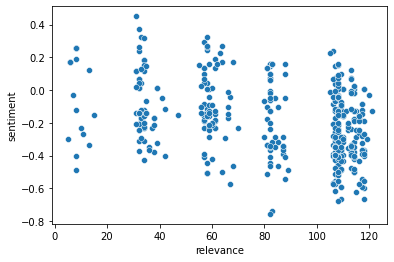

In [ ]:
sns.scatterplot(data = article_df, x = 'relevance', y = 'sentiment')

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
article_df.dtypes.values

array([dtype('float64'), dtype('int64'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('bool'), dtype('O'), dtype('O'),
       dtype('int64'), dtype('int64')], dtype=object)

In [ ]:
str(article_df.dtypes.values[-5])

'bool'

In [ ]:
article_df = article_df.dropna()

In [ ]:
numeric_article_df = article_df.select_dtypes(['number'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
minmax = MinMaxScaler()
X_ = minmax.fit_transform(numeric_article_df)
X_df = pd.DataFrame(X_, columns = numeric_article_df.columns)
X_df.head()

,sentiment,relevance,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,title_length,body_length
0,0.487013,0.284483,0.00122,0.000939,0.262207,0.20,0.238988
1,0.214286,0.508621,0.00122,0.000939,0.262207,0.40,0.009376
2,0.629870,0.974138,0.00122,0.000939,0.262207,0.20,0.174774
3,0.357143,0.293103,0.00122,0.000939,0.262207,0.10,0.231028
4,0.500000,0.086207,0.00122,0.000939,0.262207,0.25,0.090041


In [ ]:
all_r2_scores = []
tried_feature_combos = []
for name in X_df.columns.values:
  for name_2 in X_df.columns.values:
    if name == name_2:
      continue
    if [name, name_2] in tried_feature_combos:
      continue
    tried_feature_combos.append([name, name_2])
    tried_feature_combos.append([name_2, name])
    all_r2_scores.append([name, name_2, r2_score(article_df[name].values, article_df[name_2].values)])

    
sorted_r2_scores = sorted(all_r2_scores, key = lambda x: x[-1], reverse = True)
sorted_r2_scores[:5]

[['source_alexaCountryRank', 'body_length', -0.12994748795151723],
 ['source_alexaCountryRank', 'title_length', -0.17069428197513314],
 ['source_alexaGlobalRank', 'body_length', -0.17894153188106543],
 ['source_alexaGlobalRank', 'title_length', -0.19150755753819926],
 ['source_importanceRank', 'body_length', -3.6043904419344264]]

In [ ]:
sorted_r2_scores

[['source_alexaCountryRank', 'body_length', -0.12994748795151723],
 ['source_alexaCountryRank', 'title_length', -0.17069428197513314],
 ['source_alexaGlobalRank', 'body_length', -0.17894153188106543],
 ['source_alexaGlobalRank', 'title_length', -0.19150755753819926],
 ['source_importanceRank', 'body_length', -3.6043904419344264],
 ['source_importanceRank', 'title_length', -3.636761861139207],
 ['relevance', 'title_length', -5.172231325506884],
 ['source_alexaGlobalRank', 'source_importanceRank', -6.195645040598563],
 ['source_alexaCountryRank', 'source_alexaGlobalRank', -7.778699376568925],
 ['source_alexaCountryRank', 'source_importanceRank', -121.64766621960784],
 ['relevance', 'body_length', -1177.482133562341],
 ['sentiment', 'title_length', -2958.5902671125955],
 ['title_length', 'body_length', -120599.68873583412],
 ['sentiment', 'relevance', -169141.63805493678],
 ['relevance', 'source_alexaCountryRank', -512598.0552438001],
 ['relevance', 'source_alexaGlobalRank', -6652790.2834

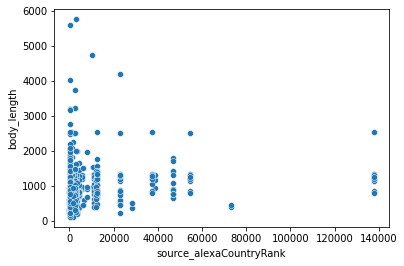

In [ ]:
sns.scatterplot(data = article_df, x = "source_alexaCountryRank", y = "body_length")

In [ ]:
with open("/content/gdrive/MyDrive/AAPI_text_analysis_project/official_outlets.json", "r") as outlets_json:
  outlets = json.load(outlets_json)

In [ ]:
outlets[0]

[{'dataType': 'news',
  'score': 355101,
  'title': 'ABC News',
  'uri': 'abcnews.go.com'},
 {'link': '/news-source/abc-news-media-bias',
  'name': 'abc_news',
  'position': 'Lean Left'}]

In [ ]:
cleaned_outlets = []
for a, b in outlets:
  obj = {}
  obj['source_score'] = a['score']
  obj['source_name'] = a['title']
  obj['source_uri'] = a['uri'] 
  obj['source_link'] = b['link']
  obj['source_position'] = b['position']
  cleaned_outlets.append(obj)
cleaned_outlets[0]

{'source_link': '/news-source/abc-news-media-bias',
 'source_name': 'ABC News',
 'source_position': 'Lean Left',
 'source_score': 355101,
 'source_uri': 'abcnews.go.com'}

In [ ]:
with open("/content/gdrive/MyDrive/AAPI_text_analysis_project/official_outlets.json", "w") as outlets_json:
  json.dump(cleaned_outlets, outlets_json)

In [ ]:
outlet_df = pd.DataFrame(cleaned_outlets)

In [ ]:
outlet_df.head()

,source_score,source_name,source_uri,source_link,source_position
0,355101,ABC News,abcnews.go.com,/news-source/abc-news-media-bias,Lean Left
1,12871,Above the Law,abovethelaw.com,/news-source/above-law-media-bias,Lean Left
2,676315,Anadolu Ajansı,aa.com.tr,/news-source/aj-media-bias,Left
3,63628,Al Jazeera Online,aljazeera.com,/news-source/al-jazeera-media-bias,Lean Left
4,41349,Alternet.org,alternet.org,/news-source/alternet-media-bias,Left


In [ ]:
article_df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,location,title_length,body_length
0,-0.168627,38,6601183495,Racial tensions simmer as Southern Baptists ho...,"NASHVILLE, Tenn. -- Race-related tensions with...",abcnews.go.com,ABC News,171,615,150359,True,2021-06-11,"Nashville, Tennessee",9,1454
1,-0.498039,64,6589548036,Asian American and Pacific Islander hate: Grap...,The U.S. has seen a disturbing surge in hate i...,abcnews.go.com,ABC News,171,615,150359,True,2021-06-03,United States,13,156
2,0.003922,118,6578408470,AP-NORC poll: More Americans believe anti-Asia...,WASHINGTON -- A majority of Americans across r...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-26,Washington (state),9,1091
3,-0.325490,39,6573140750,Floyd legislation reveals divide in police-ref...,NEW YORK -- Monifa Bandele became a community ...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-22,New York City,7,1409
4,-0.152941,15,6571115219,Police say antisemitic attacks in Los Angeles ...,LOS ANGELES -- Los Angeles police are investig...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-21,Los Angeles,10,612


In [ ]:
combined_data = []
for i, row in article_df.iterrows():
  combined_row = row.values.tolist()
  combined_row.extend(outlet_df[outlet_df['source_uri'] == row['source_uri']].drop(['source_uri', 'source_name'], axis = 1).iloc[0].values.tolist())
  combined_data.append(combined_row)
combined_df = pd.DataFrame(combined_data, columns = article_df.columns.values.tolist() + outlet_df.drop(['source_uri', 'source_name'], axis = 1).columns.values.tolist())
combined_df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,location,title_length,body_length,source_score,source_link,source_position
0,-0.168627,38,6601183495,Racial tensions simmer as Southern Baptists ho...,"NASHVILLE, Tenn. -- Race-related tensions with...",abcnews.go.com,ABC News,171,615,150359,True,2021-06-11,"Nashville, Tennessee",9,1454,355101,/news-source/abc-news-media-bias,Lean Left
1,-0.498039,64,6589548036,Asian American and Pacific Islander hate: Grap...,The U.S. has seen a disturbing surge in hate i...,abcnews.go.com,ABC News,171,615,150359,True,2021-06-03,United States,13,156,355101,/news-source/abc-news-media-bias,Lean Left
2,0.003922,118,6578408470,AP-NORC poll: More Americans believe anti-Asia...,WASHINGTON -- A majority of Americans across r...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-26,Washington (state),9,1091,355101,/news-source/abc-news-media-bias,Lean Left
3,-0.325490,39,6573140750,Floyd legislation reveals divide in police-ref...,NEW YORK -- Monifa Bandele became a community ...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-22,New York City,7,1409,355101,/news-source/abc-news-media-bias,Lean Left
4,-0.152941,15,6571115219,Police say antisemitic attacks in Los Angeles ...,LOS ANGELES -- Los Angeles police are investig...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-21,Los Angeles,10,612,355101,/news-source/abc-news-media-bias,Lean Left


In [ ]:
import tensorflow
print(tensorflow.__version__)

2.5.0


In [ ]:
combined_df['source_position'].unique()

array(['Lean Left', 'Left', 'Center', 'Lean Right', 'Right'], dtype=object)

In [ ]:
position_dict = dict((n, i) for i, n in enumerate(combined_df['source_position'].unique().tolist()))

In [ ]:
position_dict

{'Center': 2, 'Lean Left': 0, 'Lean Right': 3, 'Left': 1, 'Right': 4}

In [ ]:
position_integer = [position_dict[i] for i in combined_df['source_position'].values]
combined_df['source_pos_int'] = position_integer

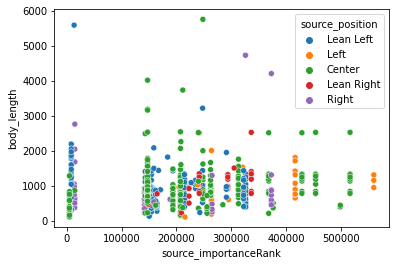

In [ ]:
sns.scatterplot(data = combined_df, x = "source_importanceRank", y = "body_length", hue = "source_position")

In [ ]:
combined_df.to_csv("/content/gdrive/MyDrive/AAPI_text_analysis_project/combined_dataframe.csv", index = False)

# 7/2/2021 Cells (Part of Speech Analysis)

In [ ]:
import re
import nltk
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from google.colab import drive


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from nltk.probability import FreqDist

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import json

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/AAPI_text_analysis_project/combined_dataframe.csv')
df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,location,title_length,body_length,source_score,source_link,source_position,source_pos_int
0,-0.168627,38,6601183495,Racial tensions simmer as Southern Baptists ho...,"NASHVILLE, Tenn. -- Race-related tensions with...",abcnews.go.com,ABC News,171,615,150359,True,2021-06-11,"Nashville, Tennessee",9,1454,355101,/news-source/abc-news-media-bias,Lean Left,0
1,-0.498039,64,6589548036,Asian American and Pacific Islander hate: Grap...,The U.S. has seen a disturbing surge in hate i...,abcnews.go.com,ABC News,171,615,150359,True,2021-06-03,United States,13,156,355101,/news-source/abc-news-media-bias,Lean Left,0
2,0.003922,118,6578408470,AP-NORC poll: More Americans believe anti-Asia...,WASHINGTON -- A majority of Americans across r...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-26,Washington (state),9,1091,355101,/news-source/abc-news-media-bias,Lean Left,0
3,-0.325490,39,6573140750,Floyd legislation reveals divide in police-ref...,NEW YORK -- Monifa Bandele became a community ...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-22,New York City,7,1409,355101,/news-source/abc-news-media-bias,Lean Left,0
4,-0.152941,15,6571115219,Police say antisemitic attacks in Los Angeles ...,LOS ANGELES -- Los Angeles police are investig...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-21,Los Angeles,10,612,355101,/news-source/abc-news-media-bias,Lean Left,0


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
def pos_freq_update(pos_tags, stops, d):
  for w, p in pos_tags:
    if w in stops:
      continue
    if p in d.keys():
        d[p] += 1
    else:
        d[p] = 1
  return d

In [ ]:
import json

In [ ]:
stop_words = set(stopwords.words('english'))
body_pos_freq = {}
title_pos_freq = {}
title_docs = []
body_docs = []
for i, row in df.iterrows():
  if i % 50 == 0: print(i);
  title_words = []
  for sent in sent_tokenize(row['title']):
    title_words.extend(word_tokenize(sent))
  body_words = []
  for sent in sent_tokenize(row['body']):
    body_words.extend(word_tokenize(sent))
  title_docs.append(json.dumps(title_words))
  body_docs.append(json.dumps(body_words))
  title_pos_freq = pos_freq_update(nltk.pos_tag(title_words), stop_words, title_pos_freq)
  body_pos_freq = pos_freq_update(nltk.pos_tag(body_words), stop_words, body_pos_freq)

df['title_doc'] = title_docs
df['body_doc'] = body_docs


0
50
100
150
200
250
300
350
400
450
500


In [ ]:
title_pos_freq.keys()

dict_keys(['JJ', 'NNS', 'VBP', 'NN', 'NNP', ':', 'VBZ', 'JJR', 'MD', 'VBN', 'VB', 'VBD', 'NNPS', 'VBG', 'IN', ',', 'POS', "''", 'DT', 'CD', 'WRB', 'RB', 'PRP', 'PRP$', 'RP', 'PDT', 'TO', '``', 'FW', 'CC', '.', 'WP', 'JJS', '(', ')', '$', 'UH', 'RBS'])

In [ ]:
body_pos_freq.keys()

dict_keys(['NNP', ',', ':', 'JJ', 'NNS', 'IN', 'VBG', 'NN', '.', 'DT', 'MD', 'VB', 'VBP', 'PRP', 'POS', 'JJS', 'VBN', 'CD', 'RB', 'VBD', 'VBZ', '``', "''", 'EX', 'JJR', 'WP$', 'NNPS', 'CC', 'WRB', 'PRP$', 'WP', 'RBR', 'UH', '(', ')', '#', '$', 'RP', 'WDT', 'TO', 'PDT', 'FW', 'RBS'])

In [ ]:
def pos_freq_count(pos_tags, stops, cols):
  d = dict((i, 0) for i in cols)
  for w, p in pos_tags:
    if w in stops:
      continue
    d[p] += 1
  return [d[i] for i in cols]

In [ ]:
title_pos_index = list(title_pos_freq.keys())
body_pos_index = list(body_pos_freq.keys())
title_pos_data = []
body_pos_data = []
for i, row in df.iterrows():
  if i % 50 == 0: print(i);

  title_pos_row = pos_freq_count(nltk.pos_tag(json.loads(row['title_doc'])), stop_words, title_pos_index)

  body_pos_row = pos_freq_count(nltk.pos_tag(json.loads(row['body_doc'])), stop_words, body_pos_index)

  title_pos_data.append(title_pos_row)

  body_pos_data.append(body_pos_row)

title_pos_df = pd.DataFrame(title_pos_data, columns = [f"title_{i}" for i in title_pos_index])

body_pos_df = pd.DataFrame(body_pos_data, columns = [f"body_{i}" for i in body_pos_index])

0
50
100
150
200
250
300
350
400
450
500


In [ ]:
title_pos_df.head()

,title_JJ,title_NNS,title_VBP,title_NN,title_NNP,title_:,title_VBZ,title_JJR,title_MD,title_VBN,title_VB,title_VBD,title_NNPS,title_VBG,title_IN,"title_,",title_POS,title_'',title_DT,title_CD,title_WRB,title_RB,title_PRP,title_PRP$,title_RP,title_PDT,title_TO,title_``,title_FW,title_CC,title_.,title_WP,title_JJS,title_(,title_),title_$,title_UH,title_RBS
0,3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,0,1,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,1,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,2,1,0,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
body_pos_df.head()

,body_NNP,"body_,",body_:,body_JJ,body_NNS,body_IN,body_VBG,body_NN,body_.,body_DT,body_MD,body_VB,body_VBP,body_PRP,body_POS,body_JJS,body_VBN,body_CD,body_RB,body_VBD,body_VBZ,body_``,body_'',body_EX,body_JJR,body_WP$,body_NNPS,body_CC,body_WRB,body_PRP$,body_WP,body_RBR,body_UH,body_(,body_),body_#,body_$,body_RP,body_WDT,body_TO,body_PDT,body_FW,body_RBS
0,174,68,6,123,80,17,24,166,60,21,9,43,17,10,13,1,22,17,33,25,16,20,20,4,2,1,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15,8,2,10,13,3,3,19,6,1,0,0,0,0,0,0,8,10,2,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,97,48,5,91,44,10,16,123,42,14,5,12,19,9,4,1,23,26,35,26,11,23,26,0,2,0,27,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,136,76,6,102,84,17,29,180,51,14,7,27,30,11,5,1,29,35,25,24,22,10,10,0,2,1,14,6,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0
4,79,33,3,38,41,6,8,69,26,10,0,9,5,1,1,2,15,9,8,21,6,11,11,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
pos_included_df = df.join(title_pos_df).join(body_pos_df)

In [ ]:
pos_included_df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,location,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_JJ,title_NNS,title_VBP,title_NN,title_NNP,title_:,title_VBZ,title_JJR,title_MD,title_VBN,title_VB,title_VBD,title_NNPS,title_VBG,title_IN,"title_,",title_POS,title_'',title_DT,...,body_JJ,body_NNS,body_IN,body_VBG,body_NN,body_.,body_DT,body_MD,body_VB,body_VBP,body_PRP,body_POS,body_JJS,body_VBN,body_CD,body_RB,body_VBD,body_VBZ,body_``,body_'',body_EX,body_JJR,body_WP$,body_NNPS,body_CC,body_WRB,body_PRP$,body_WP,body_RBR,body_UH,body_(,body_),body_#,body_$,body_RP,body_WDT,body_TO,body_PDT,body_FW,body_RBS
0,-0.168627,38,6601183495,Racial tensions simmer as Southern Baptists ho...,"NASHVILLE, Tenn. -- Race-related tensions with...",abcnews.go.com,ABC News,171,615,150359,True,2021-06-11,"Nashville, Tennessee",9,1454,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Racial"", ""tensions"", ""simmer"", ""as"", ""Southe...","[""NASHVILLE"", "","", ""Tenn."", ""--"", ""Race-relate...",3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,123,80,17,24,166,60,21,9,43,17,10,13,1,22,17,33,25,16,20,20,4,2,1,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.498039,64,6589548036,Asian American and Pacific Islander hate: Grap...,The U.S. has seen a disturbing surge in hate i...,abcnews.go.com,ABC News,171,615,150359,True,2021-06-03,United States,13,156,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Asian"", ""American"", ""and"", ""Pacific"", ""Islan...","[""The"", ""U.S."", ""has"", ""seen"", ""a"", ""disturbin...",1,2,0,1,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,10,13,3,3,19,6,1,0,0,0,0,0,0,8,10,2,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.003922,118,6578408470,AP-NORC poll: More Americans believe anti-Asia...,WASHINGTON -- A majority of Americans across r...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-26,Washington (state),9,1091,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""AP-NORC"", ""poll"", "":"", ""More"", ""Americans"", ...","[""WASHINGTON"", ""--"", ""A"", ""majority"", ""of"", ""A...",2,1,1,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,91,44,10,16,123,42,14,5,12,19,9,4,1,23,26,35,26,11,23,26,0,2,0,27,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.325490,39,6573140750,Floyd legislation reveals divide in police-ref...,NEW YORK -- Monifa Bandele became a community ...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-22,New York City,7,1409,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Floyd"", ""legislation"", ""reveals"", ""divide"", ...","[""NEW"", ""YORK"", ""--"", ""Monifa"", ""Bandele"", ""be...",1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,102,84,17,29,180,51,14,7,27,30,11,5,1,29,35,25,24,22,10,10,0,2,1,14,6,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0
4,-0.152941,15,6571115219,Police say antisemitic attacks in Los Angeles ...,LOS ANGELES -- Los Angeles police are investig...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-21,Los Angeles,10,612,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Police"", ""say"", ""antisemitic"", ""attacks"", ""i...","[""LOS"", ""ANGELES"", ""--"", ""Los"", ""Angeles"", ""po...",1,2,1,0,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,38,41,6,8,69,26,10,0,9,5,1,1,2,15,9,8,21,6,11,11,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
pos_included_df.shape

(503, 102)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
numeric_df = pos_included_df.select_dtypes(['number'])

In [ ]:
numeric_df.head()

,sentiment,relevance,uri,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,title_length,body_length,source_score,source_pos_int,title_JJ,title_NNS,title_VBP,title_NN,title_NNP,title_:,title_VBZ,title_JJR,title_MD,title_VBN,title_VB,title_VBD,title_NNPS,title_VBG,title_IN,"title_,",title_POS,title_'',title_DT,title_CD,title_WRB,title_RB,title_PRP,title_PRP$,title_RP,title_PDT,title_TO,title_``,title_FW,title_CC,...,body_JJ,body_NNS,body_IN,body_VBG,body_NN,body_.,body_DT,body_MD,body_VB,body_VBP,body_PRP,body_POS,body_JJS,body_VBN,body_CD,body_RB,body_VBD,body_VBZ,body_``,body_'',body_EX,body_JJR,body_WP$,body_NNPS,body_CC,body_WRB,body_PRP$,body_WP,body_RBR,body_UH,body_(,body_),body_#,body_$,body_RP,body_WDT,body_TO,body_PDT,body_FW,body_RBS
0,-0.168627,38,6601183495,171,615,150359,9,1454,355101,0,3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,123,80,17,24,166,60,21,9,43,17,10,13,1,22,17,33,25,16,20,20,4,2,1,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.498039,64,6589548036,171,615,150359,13,156,355101,0,1,2,0,1,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10,13,3,3,19,6,1,0,0,0,0,0,0,8,10,2,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.003922,118,6578408470,171,615,150359,9,1091,355101,0,2,1,1,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91,44,10,16,123,42,14,5,12,19,9,4,1,23,26,35,26,11,23,26,0,2,0,27,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.325490,39,6573140750,171,615,150359,7,1409,355101,0,1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,102,84,17,29,180,51,14,7,27,30,11,5,1,29,35,25,24,22,10,10,0,2,1,14,6,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0
4,-0.152941,15,6571115219,171,615,150359,10,612,355101,0,1,2,1,0,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,38,41,6,8,69,26,10,0,9,5,1,1,2,15,9,8,21,6,11,11,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
minmax = MinMaxScaler()
X_ = minmax.fit_transform(numeric_df)
X_df = pd.DataFrame(X_, columns = numeric_df.columns)
X_df.head()

,sentiment,relevance,uri,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,title_length,body_length,source_score,source_pos_int,title_JJ,title_NNS,title_VBP,title_NN,title_NNP,title_:,title_VBZ,title_JJR,title_MD,title_VBN,title_VB,title_VBD,title_NNPS,title_VBG,title_IN,"title_,",title_POS,title_'',title_DT,title_CD,title_WRB,title_RB,title_PRP,title_PRP$,title_RP,title_PDT,title_TO,title_``,title_FW,title_CC,...,body_JJ,body_NNS,body_IN,body_VBG,body_NN,body_.,body_DT,body_MD,body_VB,body_VBP,body_PRP,body_POS,body_JJS,body_VBN,body_CD,body_RB,body_VBD,body_VBZ,body_``,body_'',body_EX,body_JJR,body_WP$,body_NNPS,body_CC,body_WRB,body_PRP$,body_WP,body_RBR,body_UH,body_(,body_),body_#,body_$,body_RP,body_WDT,body_TO,body_PDT,body_FW,body_RBS
0,0.487013,0.284483,0.967255,0.00122,0.000939,0.262207,0.20,0.238988,0.1456,0.0,0.75,0.50,1.0,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.342105,0.189055,0.232877,0.210526,0.204216,0.258929,0.42,0.346154,0.318519,0.138211,0.123457,0.270833,0.076923,0.147651,0.202381,0.226027,0.094488,0.266667,0.215054,0.212766,0.666667,0.181818,0.333333,0.078947,0.023810,0.111111,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.214286,0.508621,0.943438,0.00122,0.000939,0.262207,0.40,0.009376,0.1456,0.0,0.25,0.50,0.0,0.166667,0.307692,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011696,0.022388,0.041096,0.026316,0.010540,0.017857,0.02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.053691,0.119048,0.013699,0.027559,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.629870,0.974138,0.920637,0.00122,0.000939,0.262207,0.20,0.174774,0.1456,0.0,0.50,0.25,0.5,0.500000,0.000000,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.248538,0.099502,0.136986,0.140351,0.147563,0.178571,0.28,0.192308,0.088889,0.154472,0.111111,0.083333,0.076923,0.154362,0.309524,0.239726,0.098425,0.183333,0.247312,0.276596,0.000000,0.181818,0.000000,0.710526,0.071429,0.000000,0.166667,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.357143,0.293103,0.909855,0.00122,0.000939,0.262207,0.10,0.231028,0.1456,0.0,0.25,0.25,0.5,0.333333,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.280702,0.199005,0.232877,0.254386,0.222661,0.218750,0.28,0.269231,0.200000,0.243902,0.135802,0.104167,0.076923,0.194631,0.416667,0.171233,0.090551,0.366667,0.107527,0.106383,0.000000,0.181818,0.333333,0.368421,0.071429,0.000000,0.166667,0.066667,0.333333,0.2,0.033333,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.500000,0.086207,0.905709,0.00122,0.000939,0.262207,0.25,0.090041,0.1456,0.0,0.25,0.50,0.5,0.000000,0.153846,0.0,0.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.093567,0.092040,0.082192,0.070175,0.076416,0.107143,0.20,0.000000,0.066667,0.040650,0.012346,0.020833,0.153846,0.100671,0.107143,0.054795,0.078740,0.100000,0.118280,0.117021,0.000000,0.000000,0.000000,0.026316,0.000000,0.000000,0.000000,0.066667,0.000000,0.2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_theme()

In [ ]:
pos_included_df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,location,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_JJ,title_NNS,title_VBP,title_NN,title_NNP,title_:,title_VBZ,title_JJR,title_MD,title_VBN,title_VB,title_VBD,title_NNPS,title_VBG,title_IN,"title_,",title_POS,title_'',title_DT,...,body_JJ,body_NNS,body_IN,body_VBG,body_NN,body_.,body_DT,body_MD,body_VB,body_VBP,body_PRP,body_POS,body_JJS,body_VBN,body_CD,body_RB,body_VBD,body_VBZ,body_``,body_'',body_EX,body_JJR,body_WP$,body_NNPS,body_CC,body_WRB,body_PRP$,body_WP,body_RBR,body_UH,body_(,body_),body_#,body_$,body_RP,body_WDT,body_TO,body_PDT,body_FW,body_RBS
0,-0.168627,38,6601183495,Racial tensions simmer as Southern Baptists ho...,"NASHVILLE, Tenn. -- Race-related tensions with...",abcnews.go.com,ABC News,171,615,150359,True,2021-06-11,"Nashville, Tennessee",9,1454,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Racial"", ""tensions"", ""simmer"", ""as"", ""Southe...","[""NASHVILLE"", "","", ""Tenn."", ""--"", ""Race-relate...",3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,123,80,17,24,166,60,21,9,43,17,10,13,1,22,17,33,25,16,20,20,4,2,1,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.498039,64,6589548036,Asian American and Pacific Islander hate: Grap...,The U.S. has seen a disturbing surge in hate i...,abcnews.go.com,ABC News,171,615,150359,True,2021-06-03,United States,13,156,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Asian"", ""American"", ""and"", ""Pacific"", ""Islan...","[""The"", ""U.S."", ""has"", ""seen"", ""a"", ""disturbin...",1,2,0,1,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,10,13,3,3,19,6,1,0,0,0,0,0,0,8,10,2,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.003922,118,6578408470,AP-NORC poll: More Americans believe anti-Asia...,WASHINGTON -- A majority of Americans across r...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-26,Washington (state),9,1091,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""AP-NORC"", ""poll"", "":"", ""More"", ""Americans"", ...","[""WASHINGTON"", ""--"", ""A"", ""majority"", ""of"", ""A...",2,1,1,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,91,44,10,16,123,42,14,5,12,19,9,4,1,23,26,35,26,11,23,26,0,2,0,27,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.325490,39,6573140750,Floyd legislation reveals divide in police-ref...,NEW YORK -- Monifa Bandele became a community ...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-22,New York City,7,1409,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Floyd"", ""legislation"", ""reveals"", ""divide"", ...","[""NEW"", ""YORK"", ""--"", ""Monifa"", ""Bandele"", ""be...",1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,102,84,17,29,180,51,14,7,27,30,11,5,1,29,35,25,24,22,10,10,0,2,1,14,6,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0
4,-0.152941,15,6571115219,Police say antisemitic attacks in Los Angeles ...,LOS ANGELES -- Los Angeles police are investig...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-21,Los Angeles,10,612,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Police"", ""say"", ""antisemitic"", ""attacks"", ""i...","[""LOS"", ""ANGELES"", ""--"", ""Los"", ""Angeles"", ""po...",1,2,1,0,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,38,41,6,8,69,26,10,0,9,5,1,1,2,15,9,8,21,6,11,11,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


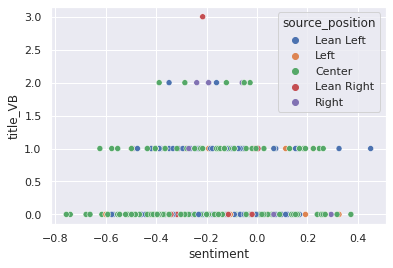

In [ ]:
sns.scatterplot(data = pos_included_df, x = "sentiment", y = "title_VB", hue = "source_position")

In [ ]:
pos_included_df.to_csv("/content/gdrive/MyDrive/AAPI_text_analysis_project/full_df_7_2_2021.csv", index = False)

# 7/3/2021 Cells (Grammar Analysis)

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
sns.set_theme()

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/AAPI_text_analysis_project/full_df_7_2_2021.csv')
df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,location,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_JJ,title_NNS,title_VBP,title_NN,title_NNP,title_:,title_VBZ,title_JJR,title_MD,title_VBN,title_VB,title_VBD,title_NNPS,title_VBG,title_IN,"title_,",title_POS,title_'',title_DT,...,body_JJ,body_NNS,body_IN,body_VBG,body_NN,body_.,body_DT,body_MD,body_VB,body_VBP,body_PRP,body_POS,body_JJS,body_VBN,body_CD,body_RB,body_VBD,body_VBZ,body_``,body_'',body_EX,body_JJR,body_WP$,body_NNPS,body_CC,body_WRB,body_PRP$,body_WP,body_RBR,body_UH,body_(,body_),body_#,body_$,body_RP,body_WDT,body_TO,body_PDT,body_FW,body_RBS
0,-0.168627,38,6601183495,Racial tensions simmer as Southern Baptists ho...,"NASHVILLE, Tenn. -- Race-related tensions with...",abcnews.go.com,ABC News,171,615,150359,True,2021-06-11,"Nashville, Tennessee",9,1454,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Racial"", ""tensions"", ""simmer"", ""as"", ""Southe...","[""NASHVILLE"", "","", ""Tenn."", ""--"", ""Race-relate...",3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,123,80,17,24,166,60,21,9,43,17,10,13,1,22,17,33,25,16,20,20,4,2,1,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.498039,64,6589548036,Asian American and Pacific Islander hate: Grap...,The U.S. has seen a disturbing surge in hate i...,abcnews.go.com,ABC News,171,615,150359,True,2021-06-03,United States,13,156,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Asian"", ""American"", ""and"", ""Pacific"", ""Islan...","[""The"", ""U.S."", ""has"", ""seen"", ""a"", ""disturbin...",1,2,0,1,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,10,13,3,3,19,6,1,0,0,0,0,0,0,8,10,2,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.003922,118,6578408470,AP-NORC poll: More Americans believe anti-Asia...,WASHINGTON -- A majority of Americans across r...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-26,Washington (state),9,1091,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""AP-NORC"", ""poll"", "":"", ""More"", ""Americans"", ...","[""WASHINGTON"", ""--"", ""A"", ""majority"", ""of"", ""A...",2,1,1,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,91,44,10,16,123,42,14,5,12,19,9,4,1,23,26,35,26,11,23,26,0,2,0,27,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.325490,39,6573140750,Floyd legislation reveals divide in police-ref...,NEW YORK -- Monifa Bandele became a community ...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-22,New York City,7,1409,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Floyd"", ""legislation"", ""reveals"", ""divide"", ...","[""NEW"", ""YORK"", ""--"", ""Monifa"", ""Bandele"", ""be...",1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,102,84,17,29,180,51,14,7,27,30,11,5,1,29,35,25,24,22,10,10,0,2,1,14,6,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0
4,-0.152941,15,6571115219,Police say antisemitic attacks in Los Angeles ...,LOS ANGELES -- Los Angeles police are investig...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-21,Los Angeles,10,612,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Police"", ""say"", ""antisemitic"", ""attacks"", ""i...","[""LOS"", ""ANGELES"", ""--"", ""Los"", ""Angeles"", ""po...",1,2,1,0,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,38,41,6,8,69,26,10,0,9,5,1,1,2,15,9,8,21,6,11,11,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(503, 102)

In [ ]:
import nltk
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [ ]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [ ]:
df['body_adjective_per_noun'] = df['body_JJ'] / (df['body_NN'] + df['body_NNS'] + df['body_NNP'])

In [ ]:
df['title_adjective_per_noun'] = df['title_JJ'] / (df['title_NN'] + df['title_NNP'] + df['title_NNS'])

In [ ]:
print(df.columns.values)

['sentiment' 'relevance' 'uri' 'title' 'body' 'source_uri' 'source_name'
 'source_alexaCountryRank' 'source_alexaGlobalRank'
 'source_importanceRank' 'source_valid_location' 'date' 'location'
 'title_length' 'body_length' 'source_score' 'source_link'
 'source_position' 'source_pos_int' 'title_doc' 'body_doc' 'title_JJ'
 'title_NNS' 'title_VBP' 'title_NN' 'title_NNP' 'title_:' 'title_VBZ'
 'title_JJR' 'title_MD' 'title_VBN' 'title_VB' 'title_VBD' 'title_NNPS'
 'title_VBG' 'title_IN' 'title_,' 'title_POS' "title_''" 'title_DT'
 'title_CD' 'title_WRB' 'title_RB' 'title_PRP' 'title_PRP$' 'title_RP'
 'title_PDT' 'title_TO' 'title_``' 'title_FW' 'title_CC' 'title_.'
 'title_WP' 'title_JJS' 'title_(' 'title_)' 'title_$' 'title_UH'
 'title_RBS' 'body_NNP' 'body_,' 'body_:' 'body_JJ' 'body_NNS' 'body_IN'
 'body_VBG' 'body_NN' 'body_.' 'body_DT' 'body_MD' 'body_VB' 'body_VBP'
 'body_PRP' 'body_POS' 'body_JJS' 'body_VBN' 'body_CD' 'body_RB'
 'body_VBD' 'body_VBZ' 'body_``' "body_''" 'body_EX' 'bo

In [ ]:
body_pos_tags = ['body_NNP', 'body_,', 'body_:', 'body_JJ', 'body_NNS', 'body_IN',
 'body_VBG', 'body_NN', 'body_.', 'body_DT', 'body_MD', 'body_VB', 'body_VBP',
 'body_PRP', 'body_POS', 'body_JJS', 'body_VBN', 'body_CD', 'body_RB',
 'body_VBD', 'body_VBZ', 'body_``', "body_''", 'body_EX', 'body_JJR', 'body_WP$',
 'body_NNPS', 'body_CC', 'body_WRB', 'body_PRP$', 'body_WP', 'body_RBR',
 'body_UH', 'body_(', 'body_)', 'body_#', 'body_$', 'body_RP', 'body_WDT',
 'body_TO', 'body_PDT', 'body_FW', 'body_RBS']
 
title_pos_tags = ['title_JJ',
 'title_NNS', 'title_VBP', 'title_NN', 'title_NNP', 'title_:', 'title_VBZ',
 'title_JJR', 'title_MD', 'title_VBN', 'title_VB', 'title_VBD', 'title_NNPS',
 'title_VBG', 'title_IN', 'title_,', 'title_POS', "title_''", 'title_DT',
 'title_CD', 'title_WRB', 'title_RB', 'title_PRP', 'title_PRP$', 'title_RP',
 'title_PDT', 'title_TO', 'title_``', 'title_FW', 'title_CC', 'title_.',
 'title_WP', 'title_JJS', 'title_(', 'title_)', 'title_$', 'title_UH',
 'title_RBS']
for b_pos in body_pos_tags:
  df[f"{b_pos}_per_word"] = df[b_pos] / df["body_length"]

for t_pos in title_pos_tags:
  df[f"{t_pos}_per_word"] = df[t_pos] / df["title_length"]


In [ ]:
df.columns

Index(['sentiment', 'relevance', 'uri', 'title', 'body', 'source_uri',
       'source_name', 'source_alexaCountryRank', 'source_alexaGlobalRank',
       'source_importanceRank',
       ...
       'title_FW_per_word', 'title_CC_per_word', 'title_._per_word',
       'title_WP_per_word', 'title_JJS_per_word', 'title_(_per_word',
       'title_)_per_word', 'title_$_per_word', 'title_UH_per_word',
       'title_RBS_per_word'],
      dtype='object', length=185)

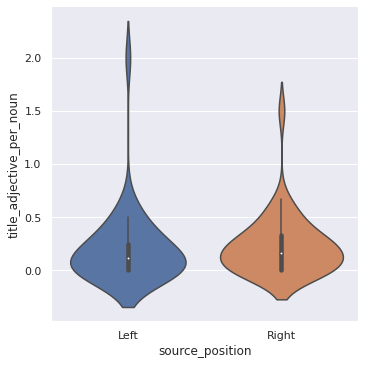

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "title_adjective_per_noun", kind = "violin")

In [ ]:
numeric_df = df.select_dtypes(['number'])
numeric_df.head()

,sentiment,relevance,uri,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,title_length,body_length,source_score,source_pos_int,title_JJ,title_NNS,title_VBP,title_NN,title_NNP,title_:,title_VBZ,title_JJR,title_MD,title_VBN,title_VB,title_VBD,title_NNPS,title_VBG,title_IN,"title_,",title_POS,title_'',title_DT,title_CD,title_WRB,title_RB,title_PRP,title_PRP$,title_RP,title_PDT,title_TO,title_``,title_FW,title_CC,...,body_FW_per_word,body_RBS_per_word,title_JJ_per_word,title_NNS_per_word,title_VBP_per_word,title_NN_per_word,title_NNP_per_word,title_:_per_word,title_VBZ_per_word,title_JJR_per_word,title_MD_per_word,title_VBN_per_word,title_VB_per_word,title_VBD_per_word,title_NNPS_per_word,title_VBG_per_word,title_IN_per_word,"title_,_per_word",title_POS_per_word,title_''_per_word,title_DT_per_word,title_CD_per_word,title_WRB_per_word,title_RB_per_word,title_PRP_per_word,title_PRP$_per_word,title_RP_per_word,title_PDT_per_word,title_TO_per_word,title_``_per_word,title_FW_per_word,title_CC_per_word,title_._per_word,title_WP_per_word,title_JJS_per_word,title_(_per_word,title_)_per_word,title_$_per_word,title_UH_per_word,title_RBS_per_word
0,-0.168627,38,6601183495,171,615,150359,9,1454,355101,0,3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.333333,0.222222,0.222222,0.111111,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.498039,64,6589548036,171,615,150359,13,156,355101,0,1,2,0,1,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.076923,0.153846,0.000000,0.076923,0.307692,0.076923,0.076923,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.003922,118,6578408470,171,615,150359,9,1091,355101,0,2,1,1,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.222222,0.111111,0.111111,0.333333,0.000000,0.111111,0.000000,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.325490,39,6573140750,171,615,150359,7,1409,355101,0,1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.142857,0.142857,0.142857,0.285714,0.142857,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.152941,15,6571115219,171,615,150359,10,612,355101,0,1,2,1,0,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.100000,0.200000,0.100000,0.000000,0.200000,0.000000,0.000000,0.000000,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cols_of_note = ['body_WRB_per_word', 'body_PDT_per_word', 'body_POS_per_word', 'body_FW_per_word', 'body_VB_per_word', 'body_MD_per_word', 'body_IN_per_word', 'body_DT_per_word', 'body_NN_per_word', 'title_length']

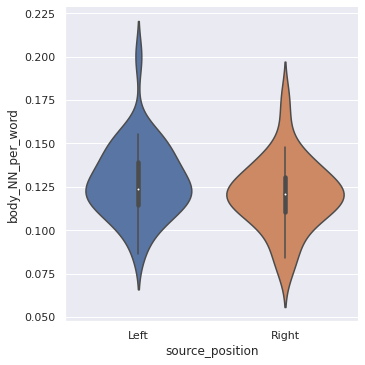

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "body_NN_per_word", kind = "violin")

In [ ]:
df['position_adjusted'] = 'center'
df.loc[df['source_position'].str.contains('Left'), 'position_adjusted'] = 'left'
df.loc[df['source_position'].str.contains('Right'), 'position_adjusted'] = 'right'
df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,location,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_JJ,title_NNS,title_VBP,title_NN,title_NNP,title_:,title_VBZ,title_JJR,title_MD,title_VBN,title_VB,title_VBD,title_NNPS,title_VBG,title_IN,"title_,",title_POS,title_'',title_DT,...,body_RBS_per_word,title_JJ_per_word,title_NNS_per_word,title_VBP_per_word,title_NN_per_word,title_NNP_per_word,title_:_per_word,title_VBZ_per_word,title_JJR_per_word,title_MD_per_word,title_VBN_per_word,title_VB_per_word,title_VBD_per_word,title_NNPS_per_word,title_VBG_per_word,title_IN_per_word,"title_,_per_word",title_POS_per_word,title_''_per_word,title_DT_per_word,title_CD_per_word,title_WRB_per_word,title_RB_per_word,title_PRP_per_word,title_PRP$_per_word,title_RP_per_word,title_PDT_per_word,title_TO_per_word,title_``_per_word,title_FW_per_word,title_CC_per_word,title_._per_word,title_WP_per_word,title_JJS_per_word,title_(_per_word,title_)_per_word,title_$_per_word,title_UH_per_word,title_RBS_per_word,position_adjusted
0,-0.168627,38,6601183495,Racial tensions simmer as Southern Baptists ho...,"NASHVILLE, Tenn. -- Race-related tensions with...",abcnews.go.com,ABC News,171,615,150359,True,2021-06-11,"Nashville, Tennessee",9,1454,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Racial"", ""tensions"", ""simmer"", ""as"", ""Southe...","[""NASHVILLE"", "","", ""Tenn."", ""--"", ""Race-relate...",3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.333333,0.222222,0.222222,0.111111,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left
1,-0.498039,64,6589548036,Asian American and Pacific Islander hate: Grap...,The U.S. has seen a disturbing surge in hate i...,abcnews.go.com,ABC News,171,615,150359,True,2021-06-03,United States,13,156,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Asian"", ""American"", ""and"", ""Pacific"", ""Islan...","[""The"", ""U.S."", ""has"", ""seen"", ""a"", ""disturbin...",1,2,0,1,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.076923,0.153846,0.000000,0.076923,0.307692,0.076923,0.076923,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left
2,0.003922,118,6578408470,AP-NORC poll: More Americans believe anti-Asia...,WASHINGTON -- A majority of Americans across r...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-26,Washington (state),9,1091,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""AP-NORC"", ""poll"", "":"", ""More"", ""Americans"", ...","[""WASHINGTON"", ""--"", ""A"", ""majority"", ""of"", ""A...",2,1,1,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.222222,0.111111,0.111111,0.333333,0.000000,0.111111,0.000000,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left
3,-0.325490,39,6573140750,Floyd legislation reveals divide in police-ref...,NEW YORK -- Monifa Bandele became a community ...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-22,New York City,7,1409,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Floyd"", ""legislation"", ""reveals"", ""divide"", ...","[""NEW"", ""YORK"", ""--"", ""Monifa"", ""Bandele"", ""be...",1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.142857,0.142857,0.142857,0.285714,0.142857,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left
4,-0.152941,15,6571115219,Police say antisemitic attacks in Los Angeles ...,LOS ANGELES -- Los Angeles police are investig...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-21,Los Angeles,10,612,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Police"", ""say"", ""antisemitic"", ""attacks"", ""i...","[""L

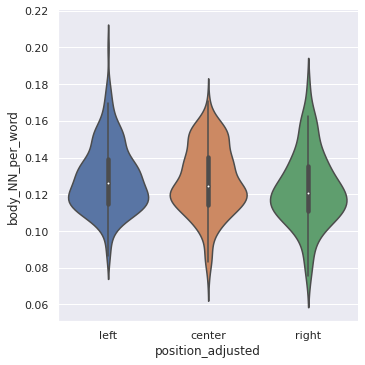

In [ ]:
sns.catplot(data = df, x = "position_adjusted", y = "body_NN_per_word", kind = "violin")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#df_raw_for_sklearn = df[df['position_adjusted'] != 'center']
df_raw_for_sklearn = df[df['source_position'].isin(['Left', 'Right'])]
cols_with_per_word = [i for i in df_raw_for_sklearn.columns if '_per_word' in i]
X_raw = df_raw_for_sklearn.select_dtypes(['number'])[cols_with_per_word]
minmax = MinMaxScaler()
X_ = minmax.fit_transform(X_raw)
#y_ = np.where(df_raw_for_sklearn['position_adjusted'] == 'left', 1, 0)
y_ = np.where(df_raw_for_sklearn['source_position'] == 'Left', 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X_, y_, train_size = .8, random_state = 0)

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.5333333333333333

In [ ]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
log_clf.score(X_test, y_test)

0.6666666666666666

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.6

In [ ]:
rf_sorted_list = list(sorted(list(zip(X_raw.columns.values, rf_clf.feature_importances_)), key = lambda x: x[1], reverse = True))

In [ ]:
rf_sorted_list[:5]

[('body_VB_per_word', 0.055334698764990725),
 ('body_:_per_word', 0.04511501358501811),
 ('body_VBD_per_word', 0.044150162736979554),
 ('body_VBN_per_word', 0.03781473230162835),
 ('body_NN_per_word', 0.03631769212164389)]

In [ ]:
log_sorted_list = list(sorted(list(zip(X_raw.columns.values.tolist(), log_clf.coef_[0])), key = lambda x: x[1], reverse = True))

In [ ]:
log_sorted_list[:5]

[('title_DT_per_word', 0.8813193803974393),
 ('body_VB_per_word', 0.8448274873823414),
 ('body_RP_per_word', 0.7812302320314004),
 ('title_VBP_per_word', 0.66692766428763),
 ('body_MD_per_word', 0.659960341614377)]

In [ ]:
log_sorted_list[-5:]

[('title_VB_per_word', -0.5624933458906036),
 ('title_._per_word', -0.5766773444998559),
 ('title_IN_per_word', -0.6406389428629997),
 ('title_VBN_per_word', -0.6409387815107871),
 ('body_VBD_per_word', -0.7401698045838929)]

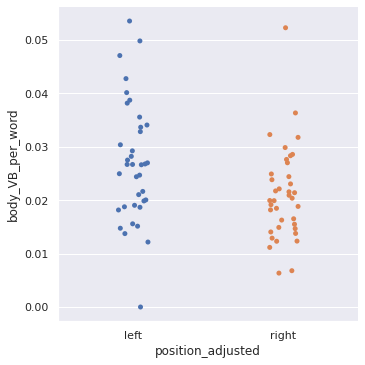

In [ ]:
sns.catplot(data = df_raw_for_sklearn, x = "position_adjusted", y = "body_VB_per_word")

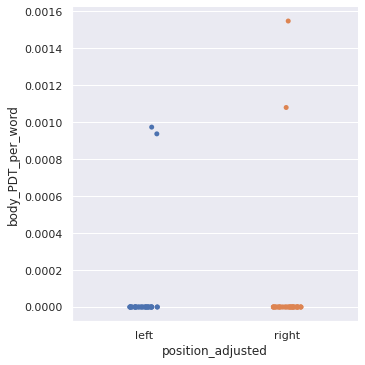

In [ ]:
sns.catplot(data = df_raw_for_sklearn, x = "position_adjusted", y = "body_PDT_per_word")

In [ ]:
df.iloc[0]['body']

'NASHVILLE, Tenn. -- Race-related tensions within the Southern Baptist Convention are high heading into a national meeting next week. The election of a new SBC president and debate over the concept of systemic racism may prove pivotal for some Black pastors as they decide whether to stay in the denomination or leave.\n\nIt could be a watershed moment for America\'s largest Protestant denomination. The SBC was founded before the Civil War as a defender of slavery, and only in 1995 did it formally apologize for that legacy -- yet since 2000 its Black membership has been increasing while white membership declines.\n\nOver the past year, however, several Black pastors have exited the SBC in frustration over what they see as racial insensitivity within its overwhelmingly white leadership.\n\nDepending on the outcome at the meeting in Nashville, the exodus could swell -- or subside. Many Black pastors are comfortable with the SBC\'s conservative theology and grateful for financial support, b

In [ ]:
nltk.download([
               'averaged_perceptron_tagger',
               'punkt',
               'vader_lexicon',
               'stopwords'
])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer


In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores(df.iloc[0]['body'])

{'compound': 0.9906, 'neg': 0.075, 'neu': 0.824, 'pos': 0.1}

In [ ]:
nltk_sentiment_body = dict((a, []) for a in ['compound', 'neg', 'neu', 'pos'])
nltk_sentiment_title = dict((a, []) for a in ['compound', 'neg', 'neu', 'pos'])
for i, row in df.iterrows():
  body_dict = sia.polarity_scores(row['body'])
  title_dict = sia.polarity_scores(row['title'])
  for k in body_dict.keys():
    nltk_sentiment_body[k].append(body_dict[k])
    nltk_sentiment_title[k].append(title_dict[k])

In [ ]:
for a in ['compound', 'neg', 'neu', 'pos']:
  df[f'nltk_body_sentiment_{a}'] = nltk_sentiment_body[a]
  df[f'nltk_title_sentiment_{a}'] = nltk_sentiment_title[a]

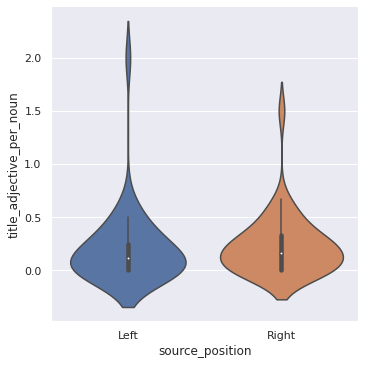

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "title_adjective_per_noun", kind = "violin")

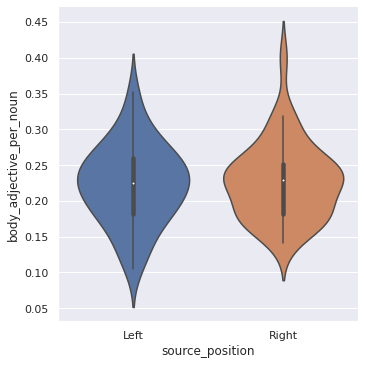

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "body_adjective_per_noun", kind = "violin")

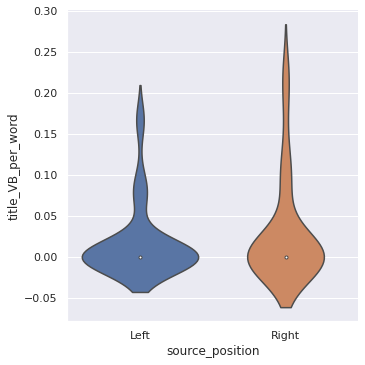

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "title_VB_per_word", kind = "violin")

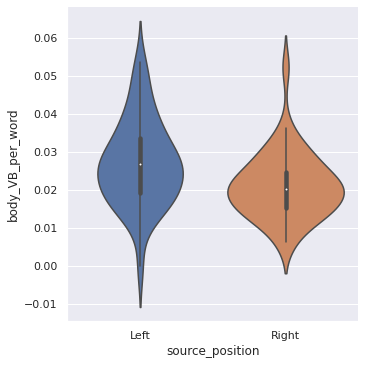

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "body_VB_per_word", kind = "violin")

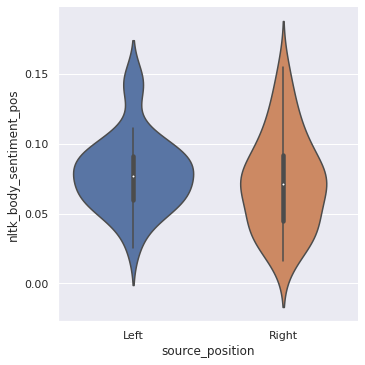

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "nltk_body_sentiment_pos", kind = "violin")

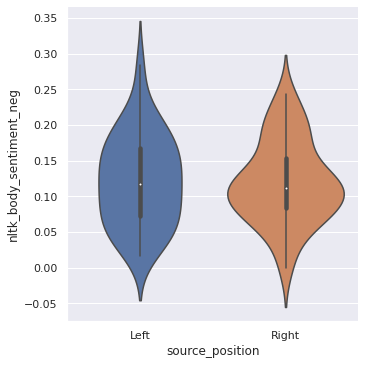

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "nltk_body_sentiment_neg", kind = "violin")

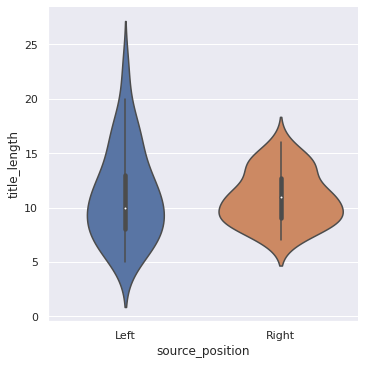

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "title_length", kind = "violin")

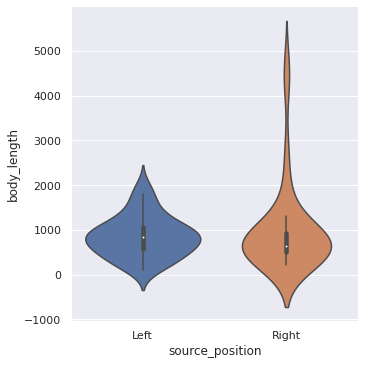

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "body_length", kind = "violin")

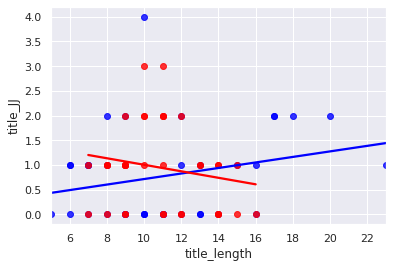

In [ ]:
sns.regplot(data = df[df['source_position'] == 'Left'], y = "title_JJ", x = "title_length", color = "blue", ci = None)
sns.regplot(data = df[df['source_position'] == 'Right'], y = "title_JJ", x = "title_length", color = "red", ci = None)

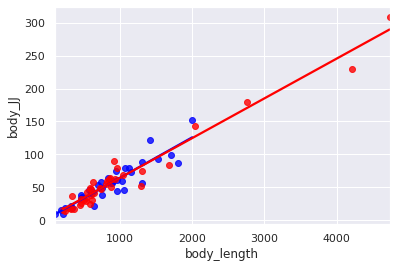

In [ ]:
sns.regplot(data = df[df['source_position'] == 'Left'], y = "body_JJ", x = "body_length", color = "blue", ci = None)
sns.regplot(data = df[df['source_position'] == 'Right'], y = "body_JJ", x = "body_length", color = "red", ci = None)

In [ ]:
from nltk.sentiment.util import mark_negation
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
s = 'I love to eat chicken wings, not chicken thighs.'
words = []
for sent in sent_tokenize(s):
  words.extend(word_tokenize(sent))

In [ ]:
mark_negation(words)

['I',
 'love',
 'to',
 'eat',
 'chicken',
 'wings',
 ',',
 'not',
 'chicken_NEG',
 'thighs_NEG',
 '.']

In [ ]:
negation_count_title = []
negation_count_body = []
for i, row in df.iterrows():
  title_neg = mark_negation(json.loads(row['title_doc']))
  title_count = 0
  for n in title_neg:
    if '_NEG' in n:
      title_count += 1
  
  body_neg = mark_negation(json.loads(row['body_doc']))
  body_count = 0
  for n in body_neg:
    if '_NEG' in n:
      body_count += 1
  
  negation_count_body.append(body_count)

  negation_count_title.append(title_count)

df['title_negation'] = negation_count_title
df['body_negation'] = negation_count_body


In [ ]:
df.shape

(503, 196)

In [ ]:
df['title_negation_per_word'] = df['title_negation'] / df['title_length']
df['body_negation_per_word'] = df['body_negation'] / df['body_length']

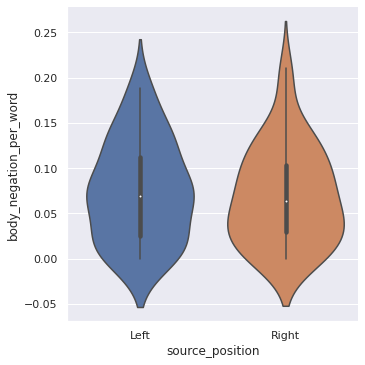

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "body_negation_per_word", kind = "violin")

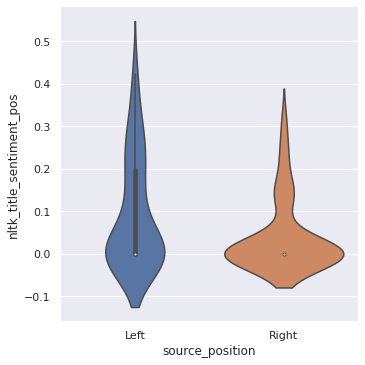

In [ ]:
sns.catplot(data = df[df['source_position'].isin(['Left', 'Right'])], x = "source_position", y = "nltk_title_sentiment_pos", kind = "violin")

In [ ]:
df.to_csv("/content/gdrive/MyDrive/AAPI_text_analysis_project/full_df_7_3_2021.csv", index = False)

# 7/3/2021 Cells Continued (Word Frequency Analysis)

In [ ]:
from google.colab import drive
import nltk, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, json


In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/AAPI_text_analysis_project/full_df_7_3_2021.csv")
df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,location,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_JJ,title_NNS,title_VBP,title_NN,title_NNP,title_:,title_VBZ,title_JJR,title_MD,title_VBN,title_VB,title_VBD,title_NNPS,title_VBG,title_IN,"title_,",title_POS,title_'',title_DT,...,title_VBD_per_word,title_NNPS_per_word,title_VBG_per_word,title_IN_per_word,"title_,_per_word",title_POS_per_word,title_''_per_word,title_DT_per_word,title_CD_per_word,title_WRB_per_word,title_RB_per_word,title_PRP_per_word,title_PRP$_per_word,title_RP_per_word,title_PDT_per_word,title_TO_per_word,title_``_per_word,title_FW_per_word,title_CC_per_word,title_._per_word,title_WP_per_word,title_JJS_per_word,title_(_per_word,title_)_per_word,title_$_per_word,title_UH_per_word,title_RBS_per_word,position_adjusted,nltk_body_sentiment_compound,nltk_title_sentiment_compound,nltk_body_sentiment_neg,nltk_title_sentiment_neg,nltk_body_sentiment_neu,nltk_title_sentiment_neu,nltk_body_sentiment_pos,nltk_title_sentiment_pos,title_negation,body_negation,title_negation_per_word,body_negation_per_word
0,-0.168627,38,6601183495,Racial tensions simmer as Southern Baptists ho...,"NASHVILLE, Tenn. -- Race-related tensions with...",abcnews.go.com,ABC News,171,615,150359,True,2021-06-11,"Nashville, Tennessee",9,1454,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Racial"", ""tensions"", ""simmer"", ""as"", ""Southe...","[""NASHVILLE"", "","", ""Tenn."", ""--"", ""Race-relate...",3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,0.9906,-0.4019,0.075,0.252,0.824,0.748,0.100,0.0,0,140,0.0,0.096286
1,-0.498039,64,6589548036,Asian American and Pacific Islander hate: Grap...,The U.S. has seen a disturbing surge in hate i...,abcnews.go.com,ABC News,171,615,150359,True,2021-06-03,United States,13,156,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Asian"", ""American"", ""and"", ""Pacific"", ""Islan...","[""The"", ""U.S."", ""has"", ""seen"", ""a"", ""disturbin...",1,2,0,1,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9833,-0.7184,0.201,0.375,0.778,0.625,0.021,0.0,0,0,0.0,0.000000
2,0.003922,118,6578408470,AP-NORC poll: More Americans believe anti-Asia...,WASHINGTON -- A majority of Americans across r...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-26,Washington (state),9,1091,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""AP-NORC"", ""poll"", "":"", ""More"", ""Americans"", ...","[""WASHINGTON"", ""--"", ""A"", ""majority"", ""of"", ""A...",2,1,1,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9982,-0.5719,0.141,0.346,0.795,0.654,0.065,0.0,0,91,0.0,0.083410
3,-0.325490,39,6573140750,Floyd legislation reveals divide in police-ref...,NEW YORK -- Monifa Bandele became a community ...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-22,New York City,7,1409,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Floyd"", ""legislation"", ""reveals"", ""divide"", ...","[""NEW"", ""YORK"", ""--"", ""Monifa"", ""Bandele"", ""be...",1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,0.9601,0.0000,0.073,0.000,0.838,1.000,0.089,0.0,0,94,0.0,0.066714
4,-0.152941,15,6571115219,Police say antisemitic attacks in Los Angeles ...,LOS ANGELES -- Los Angeles police are investig...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-21,Los Angeles,10,612,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Police"", ""say"", ""antisemitic"", ""attacks"", ""i...","[""LOS"", ""ANGELES"", ""-

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [ ]:
import string
puncs = string.punctuation
puncs

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
porter_stemmer = PorterStemmer()
title_stemmed = []
body_stemmed = []
stem_set_title = set()
stem_set_body = set()
for i, row in df.iterrows():
  if i % 50 == 0: print(i);

  stemmed_row_title = []
  for w in json.loads(row['title_doc']):
    if w[0] in puncs:
      continue
    if w in stop_words:
      continue
    stemmed_w = porter_stemmer.stem(w)
    stem_set_title.add(stemmed_w)
    stemmed_row_title.append(stemmed_w)
  
  stemmed_row_body = []
  for w in json.loads(row['body_doc']):
    if w[0] in puncs:
      continue
    if w in stop_words:
      continue
    stemmed_w = porter_stemmer.stem(w)
    stem_set_body.add(stemmed_w)
    stemmed_row_body.append(stemmed_w)

  title_stemmed.append(json.dumps(stemmed_row_title))
  body_stemmed.append(json.dumps(stemmed_row_body))


0
50
100
150
200
250
300
350
400
450
500


In [ ]:
df['title_stem'] = title_stemmed
df['body_stem'] = body_stemmed

In [ ]:
len(stem_set_title)

1048

In [ ]:
len(stem_set_body)

10452

In [ ]:
dict((a, 0) for a in df['source_position'].unique())

{'Center': 0, 'Lean Left': 0, 'Lean Right': 0, 'Left': 0, 'Right': 0}

In [ ]:
from tqdm import tqdm

In [ ]:
title_stem_data = []
for i, stem in enumerate(stem_set_title):
  if i % 100 == 0: print(i);
  row_dict = dict((a, 0) for a in df['source_position'].unique())
  for i, row in df.iterrows():
    for w in json.loads(row['title_stem']):
      if w == stem:
        row_dict[row['source_position']] += 1

  row_dict['stem'] = stem
  title_stem_data.append(row_dict)

title_stem_df = pd.DataFrame(title_stem_data)
title_stem_df.head()


0
100
200
300
400
500
600
700
800
900
1000


,Lean Left,Left,Center,Lean Right,Right,stem
0,0,1,0,0,0,applaud
1,0,0,1,0,0,chain
2,2,1,10,0,1,u.s.
3,0,0,1,0,0,rest
4,6,0,5,0,0,nation


In [ ]:
title_stem_df['usage_sum'] = title_stem_df.drop('stem', axis = 1).sum(axis = 1)

In [ ]:
title_stem_df.sort_values('usage_sum', ascending = False)

,Lean Left,Left,Center,Lean Right,Right,stem,usage_sum
361,48,6,73,9,8,asian,144
701,43,2,68,11,8,american,132
627,45,6,54,3,4,hate,112
906,24,3,45,9,7,biden,88
286,30,4,39,2,4,crime,79
...,...,...,...,...,...,...,...
472,0,0,0,0,1,root,1
473,0,0,1,0,0,refer,1
474,1,0,0,0,0,million,1
475,0,0,1,0,0,onlin,1


In [ ]:
title_stem_df['0_per_article_left'] = title_stem_df['Left'] / df[df['source_position'] == "Left"].shape[0]
title_stem_df['1_per_article_lean_left'] = title_stem_df['Lean Left'] / df[df['source_position'] == "Lean Left"].shape[0]
title_stem_df['4_per_article_right'] = title_stem_df['Right'] / df[df['source_position'] == "Right"].shape[0]
title_stem_df['3_per_article_lean_right'] = title_stem_df['Lean Right'] / df[df['source_position'] == "Lean Right"].shape[0]
title_stem_df['2_per_article_center'] = title_stem_df['Center'] / df[df['source_position'] == "Center"].shape[0]



In [ ]:
melt_title_df = pd.melt(title_stem_df, id_vars = ["stem", "usage_sum"], value_vars = ["0_per_article_left",
                                                                "1_per_article_lean_left",
                                                                "4_per_article_right",
                                                                "3_per_article_lean_right",
                                                                "2_per_article_center"],
                  var_name = "position",
                  value_name = "usage_per_article")
melt_title_df.head()

,stem,usage_sum,position,usage_per_article
0,applaud,1,0_per_article_left,0.027027
1,chain,1,0_per_article_left,0.000000
2,u.s.,14,0_per_article_left,0.027027
3,rest,1,0_per_article_left,0.000000
4,nation,11,0_per_article_left,0.000000


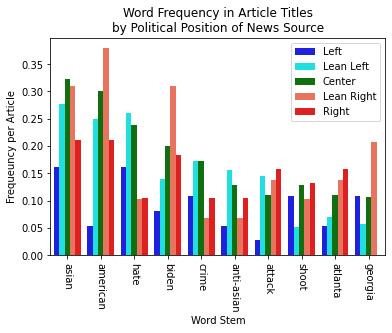

In [ ]:
sns.barplot(data = melt_title_df.sort_values('usage_sum', ascending = False).iloc[:50], x = "stem", y = "usage_per_article", hue = "position", hue_order = ["0_per_article_left",
                                                                "1_per_article_lean_left",
                                                                "2_per_article_center",
                                                                "3_per_article_lean_right",
                                                                "4_per_article_right"],
                       palette = ["blue", "cyan", "green", 'tomato', 'red'])

plt.xticks(rotation = -90)

ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()

new_handles = [h for h, l in sorted(zip(handles, labels), key = lambda x: x[1])]

ax.legend(new_handles, ["Left", "Lean Left", "Center", "Lean Right", "Right"])

plt.title("Word Frequency in Article Titles\nby Political Position of News Source")

plt.xlabel("Word Stem")

plt.ylabel("Frequeuncy per Article")

pass


In [ ]:
body_stem_data = []
for i, stem in enumerate(stem_set_body):
  if i % 100 == 0: print(i);
  row_dict = dict((a, 0) for a in df['source_position'].unique())
  for i, row in df.iterrows():
    for w in json.loads(row['body_stem']):
      if w == stem:
        row_dict[row['source_position']] += 1

  row_dict['stem'] = stem
  body_stem_data.append(row_dict)

body_stem_df = pd.DataFrame(body_stem_data)
body_stem_df.head()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400


,Lean Left,Left,Center,Lean Right,Right,stem
0,6,0,0,0,0,randl
1,0,0,0,0,1,spreader
2,0,0,0,0,1,unalien
3,1,1,1,0,1,librari
4,27,3,31,7,6,scapego


In [ ]:
body_stem_df['usage_sum'] = body_stem_df.drop('stem', axis = 1).sum(axis = 1)
body_stem_df.sort_values('usage_sum', ascending = False).head()

,Lean Left,Left,Center,Lean Right,Right,stem,usage_sum
6606,1754,225,2354,381,226,said,4940
1579,1077,182,1755,249,242,asian,3505
8320,1049,175,1728,224,228,american,3404
9289,1024,208,1445,225,229,the,3131
10160,717,125,1172,117,106,hate,2237


In [ ]:
body_stem_df['0_per_article_left'] = body_stem_df['Left'] / df[df['source_position'] == "Left"].shape[0]
body_stem_df['1_per_article_lean_left'] = body_stem_df['Lean Left'] / df[df['source_position'] == "Lean Left"].shape[0]
body_stem_df['4_per_article_right'] = body_stem_df['Right'] / df[df['source_position'] == "Right"].shape[0]
body_stem_df['3_per_article_lean_right'] = body_stem_df['Lean Right'] / df[df['source_position'] == "Lean Right"].shape[0]
body_stem_df['2_per_article_center'] = body_stem_df['Center'] / df[df['source_position'] == "Center"].shape[0]

In [ ]:
melt_body_df = pd.melt(body_stem_df, id_vars = ["stem", "usage_sum"], value_vars = ["0_per_article_left",
                                                                "1_per_article_lean_left",
                                                                "4_per_article_right",
                                                                "3_per_article_lean_right",
                                                                "2_per_article_center"],
                  var_name = "position",
                  value_name = "usage_per_article")
melt_body_df.head()

,stem,usage_sum,position,usage_per_article
0,randl,6,0_per_article_left,0.000000
1,spreader,1,0_per_article_left,0.000000
2,unalien,1,0_per_article_left,0.000000
3,librari,4,0_per_article_left,0.027027
4,scapego,74,0_per_article_left,0.081081


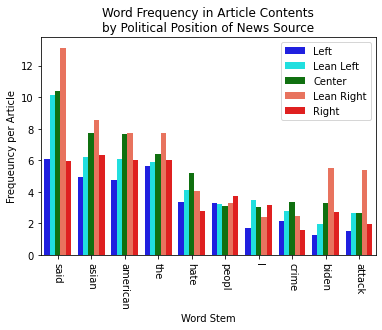

In [ ]:
sns.barplot(data = melt_body_df.sort_values('usage_sum', ascending = False).iloc[:50], x = "stem", y = "usage_per_article", hue = "position", hue_order = ["0_per_article_left",
                                                                "1_per_article_lean_left",
                                                                "2_per_article_center",
                                                                "3_per_article_lean_right",
                                                                "4_per_article_right"],
                       palette = ["blue", "cyan", "green", 'tomato', 'red'])

plt.xticks(rotation = -90)

ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()

new_handles = [h for h, l in sorted(zip(handles, labels), key = lambda x: x[1])]

ax.legend(new_handles, ["Left", "Lean Left", "Center", "Lean Right", "Right"])

plt.title("Word Frequency in Article Contents\nby Political Position of News Source")

plt.xlabel("Word Stem")

plt.ylabel("Frequeuncy per Article")

pass

In [ ]:
# Import Python Packages
import smtplib
# Set Global Variables
gmail_user = 'nuowen0612@gmail.com'
gmail_password = 'jgfllfxcxgegfwjn'
# Create Email 
mail_from = gmail_user
mail_to = 'nuowen.lei@concordacademy.org'
mail_subject = 'Finished Article Body Processing!'
mail_message_body = 'Go visit it!'

mail_message = '''\
From: %s
To: %s
Subject: %s
%s
''' % (mail_from, mail_to, mail_subject, mail_message_body)
# Sent Email
server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
server.login(gmail_user, gmail_password)
server.sendmail(mail_from, mail_to, mail_message)
server.close()

In [ ]:
title_stem_df.to_csv("/content/gdrive/MyDrive/AAPI_text_analysis_project/title_stem_dataframe.csv", index = False)

In [ ]:
body_stem_df.to_csv("/content/gdrive/MyDrive/AAPI_text_analysis_project/body_stem_dataframe.csv", index = False)

# 7/4/2021 Cells (Part of Speech and Word Choice Combined Analysis)

In [ ]:
# Filter WORD CHOICE by PART OF SPEECH, like 10 HIGHEST-USED ADJECTIVES or NOUNS

In [ ]:
# Filter by political position

In [ ]:
# Start building a narrative

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [ ]:
import nltk

In [ ]:
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import string
puncs = string.punctuation
puncs

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/AAPI_text_analysis_project/full_df_7_3_2021.csv")
df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,location,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_JJ,title_NNS,title_VBP,title_NN,title_NNP,title_:,title_VBZ,title_JJR,title_MD,title_VBN,title_VB,title_VBD,title_NNPS,title_VBG,title_IN,"title_,",title_POS,title_'',title_DT,...,title_VBD_per_word,title_NNPS_per_word,title_VBG_per_word,title_IN_per_word,"title_,_per_word",title_POS_per_word,title_''_per_word,title_DT_per_word,title_CD_per_word,title_WRB_per_word,title_RB_per_word,title_PRP_per_word,title_PRP$_per_word,title_RP_per_word,title_PDT_per_word,title_TO_per_word,title_``_per_word,title_FW_per_word,title_CC_per_word,title_._per_word,title_WP_per_word,title_JJS_per_word,title_(_per_word,title_)_per_word,title_$_per_word,title_UH_per_word,title_RBS_per_word,position_adjusted,nltk_body_sentiment_compound,nltk_title_sentiment_compound,nltk_body_sentiment_neg,nltk_title_sentiment_neg,nltk_body_sentiment_neu,nltk_title_sentiment_neu,nltk_body_sentiment_pos,nltk_title_sentiment_pos,title_negation,body_negation,title_negation_per_word,body_negation_per_word
0,-0.168627,38,6601183495,Racial tensions simmer as Southern Baptists ho...,"NASHVILLE, Tenn. -- Race-related tensions with...",abcnews.go.com,ABC News,171,615,150359,True,2021-06-11,"Nashville, Tennessee",9,1454,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Racial"", ""tensions"", ""simmer"", ""as"", ""Southe...","[""NASHVILLE"", "","", ""Tenn."", ""--"", ""Race-relate...",3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,0.9906,-0.4019,0.075,0.252,0.824,0.748,0.100,0.0,0,140,0.0,0.096286
1,-0.498039,64,6589548036,Asian American and Pacific Islander hate: Grap...,The U.S. has seen a disturbing surge in hate i...,abcnews.go.com,ABC News,171,615,150359,True,2021-06-03,United States,13,156,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Asian"", ""American"", ""and"", ""Pacific"", ""Islan...","[""The"", ""U.S."", ""has"", ""seen"", ""a"", ""disturbin...",1,2,0,1,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9833,-0.7184,0.201,0.375,0.778,0.625,0.021,0.0,0,0,0.0,0.000000
2,0.003922,118,6578408470,AP-NORC poll: More Americans believe anti-Asia...,WASHINGTON -- A majority of Americans across r...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-26,Washington (state),9,1091,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""AP-NORC"", ""poll"", "":"", ""More"", ""Americans"", ...","[""WASHINGTON"", ""--"", ""A"", ""majority"", ""of"", ""A...",2,1,1,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9982,-0.5719,0.141,0.346,0.795,0.654,0.065,0.0,0,91,0.0,0.083410
3,-0.325490,39,6573140750,Floyd legislation reveals divide in police-ref...,NEW YORK -- Monifa Bandele became a community ...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-22,New York City,7,1409,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Floyd"", ""legislation"", ""reveals"", ""divide"", ...","[""NEW"", ""YORK"", ""--"", ""Monifa"", ""Bandele"", ""be...",1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,0.9601,0.0000,0.073,0.000,0.838,1.000,0.089,0.0,0,94,0.0,0.066714
4,-0.152941,15,6571115219,Police say antisemitic attacks in Los Angeles ...,LOS ANGELES -- Los Angeles police are investig...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-21,Los Angeles,10,612,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Police"", ""say"", ""antisemitic"", ""attacks"", ""i...","[""LOS"", ""ANGELES"", ""-

In [ ]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import json

In [ ]:
porter_stemmer = PorterStemmer()
title_stemmed = []
title_stemmed_pos = []
body_stemmed = []
body_stemmed_pos = []
stem_set_title = []
stem_set_body = []
for i, row in df.iterrows():
  if i % 50 == 0: print(i);

  stemmed_row_title = []
  row_title_pos = []
  for w, p_ in nltk.pos_tag(json.loads(row['title_doc'])):
    p = p_[:2]
    if w[0] in puncs:
      continue
    if w in stop_words:
      continue
    stemmed_w = porter_stemmer.stem(w)
    if [stemmed_w, p] not in stem_set_title:
      stem_set_title.append([stemmed_w, p])
    stemmed_row_title.append(stemmed_w)
    row_title_pos.append(p)
  
  stemmed_row_body = []
  row_body_pos = []
  for w, p_ in nltk.pos_tag(json.loads(row['body_doc'])):
    p = p_[:2]
    if w[0] in puncs:
      continue
    if w in stop_words:
      continue
    stemmed_w = porter_stemmer.stem(w)
    if [stemmed_w, p] not in stem_set_body:
      stem_set_body.append([stemmed_w, p])
    stemmed_row_body.append(stemmed_w)
    row_body_pos.append(p)

  title_stemmed.append(json.dumps(stemmed_row_title))
  title_stemmed_pos.append(json.dumps(row_title_pos))
  body_stemmed.append(json.dumps(stemmed_row_body))
  body_stemmed_pos.append(json.dumps(row_body_pos))


0
50
100
150
200
250
300
350
400
450
500


In [ ]:
stem_set_title[:5]

[['racial', 'JJ'],
 ['tension', 'NN'],
 ['simmer', 'VB'],
 ['southern', 'JJ'],
 ['baptist', 'NN']]

In [ ]:
df['title_stem'] = title_stemmed

df['title_stem_pos'] = title_stemmed_pos

df['body_stem'] = body_stemmed

df['body_stem_pos'] = body_stemmed_pos

df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,location,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_JJ,title_NNS,title_VBP,title_NN,title_NNP,title_:,title_VBZ,title_JJR,title_MD,title_VBN,title_VB,title_VBD,title_NNPS,title_VBG,title_IN,"title_,",title_POS,title_'',title_DT,...,"title_,_per_word",title_POS_per_word,title_''_per_word,title_DT_per_word,title_CD_per_word,title_WRB_per_word,title_RB_per_word,title_PRP_per_word,title_PRP$_per_word,title_RP_per_word,title_PDT_per_word,title_TO_per_word,title_``_per_word,title_FW_per_word,title_CC_per_word,title_._per_word,title_WP_per_word,title_JJS_per_word,title_(_per_word,title_)_per_word,title_$_per_word,title_UH_per_word,title_RBS_per_word,position_adjusted,nltk_body_sentiment_compound,nltk_title_sentiment_compound,nltk_body_sentiment_neg,nltk_title_sentiment_neg,nltk_body_sentiment_neu,nltk_title_sentiment_neu,nltk_body_sentiment_pos,nltk_title_sentiment_pos,title_negation,body_negation,title_negation_per_word,body_negation_per_word,title_stem,title_stem_pos,body_stem,body_stem_pos
0,-0.168627,38,6601183495,Racial tensions simmer as Southern Baptists ho...,"NASHVILLE, Tenn. -- Race-related tensions with...",abcnews.go.com,ABC News,171,615,150359,True,2021-06-11,"Nashville, Tennessee",9,1454,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Racial"", ""tensions"", ""simmer"", ""as"", ""Southe...","[""NASHVILLE"", "","", ""Tenn."", ""--"", ""Race-relate...",3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,0.9906,-0.4019,0.075,0.252,0.824,0.748,0.100,0.0,0,140,0.0,0.096286,"[""racial"", ""tension"", ""simmer"", ""southern"", ""b...","[""JJ"", ""NN"", ""VB"", ""JJ"", ""NN"", ""VB"", ""JJ"", ""NN""]","[""nashvil"", ""tenn."", ""race-rel"", ""tension"", ""w...","[""NN"", ""NN"", ""JJ"", ""NN"", ""IN"", ""JJ"", ""NN"", ""NN..."
1,-0.498039,64,6589548036,Asian American and Pacific Islander hate: Grap...,The U.S. has seen a disturbing surge in hate i...,abcnews.go.com,ABC News,171,615,150359,True,2021-06-03,United States,13,156,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Asian"", ""American"", ""and"", ""Pacific"", ""Islan...","[""The"", ""U.S."", ""has"", ""seen"", ""a"", ""disturbin...",1,2,0,1,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9833,-0.7184,0.201,0.375,0.778,0.625,0.021,0.0,0,0,0.0,0.000000,"[""asian"", ""american"", ""pacif"", ""island"", ""hate...","[""JJ"", ""NN"", ""NN"", ""NN"", ""NN"", ""NN"", ""VB"", ""NN...","[""the"", ""u.s."", ""seen"", ""disturb"", ""surg"", ""ha...","[""DT"", ""NN"", ""VB"", ""VB"", ""NN"", ""JJ"", ""NN"", ""JJ..."
2,0.003922,118,6578408470,AP-NORC poll: More Americans believe anti-Asia...,WASHINGTON -- A majority of Americans across r...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-26,Washington (state),9,1091,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""AP-NORC"", ""poll"", "":"", ""More"", ""Americans"", ...","[""WASHINGTON"", ""--"", ""A"", ""majority"", ""of"", ""A...",2,1,1,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9982,-0.5719,0.141,0.346,0.795,0.654,0.065,0.0,0,91,0.0,0.083410,"[""ap-norc"", ""poll"", ""more"", ""american"", ""belie...","[""JJ"", ""NN"", ""JJ"", ""NN"", ""VB"", ""JJ"", ""NN"", ""NN""]","[""washington"", ""A"", ""major"", ""american"", ""acro...","[""NN"", ""DT"", ""NN"", ""NN"", ""IN"", ""JJ"", ""JJ"", ""NN..."
3,-0.325490,39,6573140750,Floyd legislation reveals divide in police-ref...,NEW YORK -- Monifa Bandele became a community ...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-22,New York City,7,1409,355101,/news-source/abc-news-media-bias,

In [ ]:
df.to_csv("/content/gdrive/MyDrive/AAPI_text_analysis_project/full_df_7_4_2021.csv", index = False)

In [ ]:
title_stem_data = []
print(f"Total: {len(stem_set_title)}")

for i, (stem, p) in enumerate(stem_set_title):
  if i % 100 == 0: print(i);
  row_dict = dict((a, 0) for a in df['source_position'].unique())
  for i, row in df.iterrows():
    for w, p1 in zip(json.loads(row['title_stem']), json.loads(row['title_stem_pos'])):
      if w == stem and p == p1:
        row_dict[row['source_position']] += 1

  row_dict['stem'] = stem
  row_dict['pos'] = p
  title_stem_data.append(row_dict)

title_stem_df = pd.DataFrame(title_stem_data)
title_stem_df.head()

Total: 1207
0
100
200
300
400
500
600
700
800
900
1000
1100
1200


,Lean Left,Left,Center,Lean Right,Right,stem,pos
0,11,0,15,0,4,racial,JJ
1,3,1,1,0,0,tension,NN
2,2,1,1,0,0,simmer,VB
3,3,1,1,0,0,southern,JJ
4,4,1,2,0,0,baptist,NN


In [ ]:
body_stem_data = []
print(f"Total: {len(stem_set_body)}")

for i, (stem, p) in enumerate(stem_set_body):
  if i % 100 == 0: print(i);
  row_dict = dict((a, 0) for a in df['source_position'].unique())
  for i, row in df.iterrows():
    for w, p1 in zip(json.loads(row['body_stem']), json.loads(row['body_stem_pos'])):
      if w == stem and p == p1:
        row_dict[row['source_position']] += 1

  row_dict['stem'] = stem
  row_dict['pos'] = p
  body_stem_data.append(row_dict)

body_stem_df = pd.DataFrame(body_stem_data)
body_stem_df.head()

Total: 13634
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600


,Lean Left,Left,Center,Lean Right,Right,stem,pos
0,10,3,4,0,0,nashvil,NN
1,4,0,1,0,0,tenn.,NN
2,7,2,3,0,1,race-rel,JJ
3,24,3,20,2,2,tension,NN
4,34,6,43,4,10,within,IN


In [ ]:
title_stem_df['usage_sum'] = title_stem_df.drop('stem', axis = 1).sum(axis = 1)

In [ ]:
body_stem_df['usage_sum'] = body_stem_df.drop('stem', axis = 1).sum(axis = 1)

In [ ]:
title_stem_df['0_per_article_left'] = title_stem_df['Left'] / df[df['source_position'] == "Left"].shape[0]
title_stem_df['1_per_article_lean_left'] = title_stem_df['Lean Left'] / df[df['source_position'] == "Lean Left"].shape[0]
title_stem_df['4_per_article_right'] = title_stem_df['Right'] / df[df['source_position'] == "Right"].shape[0]
title_stem_df['3_per_article_lean_right'] = title_stem_df['Lean Right'] / df[df['source_position'] == "Lean Right"].shape[0]
title_stem_df['2_per_article_center'] = title_stem_df['Center'] / df[df['source_position'] == "Center"].shape[0]


In [ ]:
body_stem_df['0_per_article_left'] = body_stem_df['Left'] / df[df['source_position'] == "Left"].shape[0]
body_stem_df['1_per_article_lean_left'] = body_stem_df['Lean Left'] / df[df['source_position'] == "Lean Left"].shape[0]
body_stem_df['4_per_article_right'] = body_stem_df['Right'] / df[df['source_position'] == "Right"].shape[0]
body_stem_df['3_per_article_lean_right'] = body_stem_df['Lean Right'] / df[df['source_position'] == "Lean Right"].shape[0]
body_stem_df['2_per_article_center'] = body_stem_df['Center'] / df[df['source_position'] == "Center"].shape[0]

In [ ]:
for col in ["0_per_article_left", "1_per_article_lean_left", "4_per_article_right", "3_per_article_lean_right", "2_per_article_center"]:
  title_stem_df[f"{col}_copy"] = title_stem_df[col]
  body_stem_df[f"{col}_copy"] = body_stem_df[col]


In [ ]:
title_stem_df.sort_values('usage_sum', ascending = False).head()

,Lean Left,Left,Center,Lean Right,Right,stem,pos,usage_sum,0_per_article_left,1_per_article_lean_left,4_per_article_right,3_per_article_lean_right,2_per_article_center,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy
8,41,5,66,9,5,asian,JJ,126,0.135135,0.236994,0.131579,0.310345,0.292035,0.135135,0.236994,0.131579,0.310345,0.292035
9,34,2,55,10,7,american,NN,108,0.054054,0.196532,0.184211,0.344828,0.243363,0.054054,0.196532,0.184211,0.344828,0.243363
173,23,3,45,9,6,biden,NN,86,0.081081,0.132948,0.157895,0.310345,0.199115,0.081081,0.132948,0.157895,0.310345,0.199115
12,34,5,38,1,1,hate,NN,79,0.135135,0.196532,0.026316,0.034483,0.168142,0.135135,0.196532,0.026316,0.034483,0.168142
42,30,4,39,2,4,crime,NN,79,0.108108,0.173410,0.105263,0.068966,0.172566,0.108108,0.173410,0.105263,0.068966,0.172566


In [ ]:
body_stem_df.sort_values('usage_sum', ascending = False).head()

,Lean Left,Left,Center,Lean Right,Right,stem,pos,usage_sum,0_per_article_left,1_per_article_lean_left,4_per_article_right,3_per_article_lean_right,2_per_article_center,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy
94,1754,224,2354,381,226,said,VB,4939,6.054054,10.138728,5.947368,13.137931,10.415929,6.054054,10.138728,5.947368,13.137931,10.415929
353,948,150,1586,231,204,asian,JJ,3119,4.054054,5.479769,5.368421,7.965517,7.017699,4.054054,5.479769,5.368421,7.965517,7.017699
14,1024,208,1442,222,220,the,DT,3116,5.621622,5.919075,5.789474,7.655172,6.380531,5.621622,5.919075,5.789474,7.655172,6.380531
336,781,123,1281,174,161,american,NN,2520,3.324324,4.514451,4.236842,6.000000,5.668142,3.324324,4.514451,4.236842,6.000000,5.668142
315,558,122,693,93,141,peopl,NN,1607,3.297297,3.225434,3.710526,3.206897,3.066372,3.297297,3.225434,3.710526,3.206897,3.066372


In [ ]:
melt_title_df = pd.melt(title_stem_df, id_vars = ["stem",
                                                  "usage_sum",
                                                  "pos",
                                                  "0_per_article_left_copy",
                                                  "1_per_article_lean_left_copy",
                                                  "4_per_article_right_copy",
                                                  "3_per_article_lean_right_copy",
                                                  "2_per_article_center_copy"
                                                  ],
                        value_vars = ["0_per_article_left",
                                      "1_per_article_lean_left",
                                      "4_per_article_right",
                                      "3_per_article_lean_right",
                                      "2_per_article_center"],
                  var_name = "position",
                  value_name = "usage_per_article")
melt_title_df.head()

,stem,usage_sum,pos,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy,position,usage_per_article
0,racial,30,JJ,0.000000,0.063584,0.105263,0.0,0.066372,0_per_article_left,0.000000
1,tension,5,NN,0.027027,0.017341,0.000000,0.0,0.004425,0_per_article_left,0.027027
2,simmer,4,VB,0.027027,0.011561,0.000000,0.0,0.004425,0_per_article_left,0.027027
3,southern,5,JJ,0.027027,0.017341,0.000000,0.0,0.004425,0_per_article_left,0.027027
4,baptist,7,NN,0.027027,0.023121,0.000000,0.0,0.008850,0_per_article_left,0.027027


In [ ]:
melt_body_df = pd.melt(body_stem_df, id_vars = ["stem",
                                                  "usage_sum",
                                                  "pos",
                                                  "0_per_article_left_copy",
                                                  "1_per_article_lean_left_copy",
                                                  "4_per_article_right_copy",
                                                  "3_per_article_lean_right_copy",
                                                  "2_per_article_center_copy"
                                                  ],
                        value_vars = ["0_per_article_left",
                                      "1_per_article_lean_left",
                                      "4_per_article_right",
                                      "3_per_article_lean_right",
                                      "2_per_article_center"],
                  var_name = "position",
                  value_name = "usage_per_article")
melt_body_df.head()

,stem,usage_sum,pos,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy,position,usage_per_article
0,nashvil,17,NN,0.081081,0.057803,0.000000,0.000000,0.017699,0_per_article_left,0.081081
1,tenn.,5,NN,0.000000,0.023121,0.000000,0.000000,0.004425,0_per_article_left,0.000000
2,race-rel,13,JJ,0.054054,0.040462,0.026316,0.000000,0.013274,0_per_article_left,0.054054
3,tension,51,NN,0.081081,0.138728,0.052632,0.068966,0.088496,0_per_article_left,0.081081
4,within,97,IN,0.162162,0.196532,0.263158,0.137931,0.190265,0_per_article_left,0.162162


In [ ]:
def plot_word_usage_by_pos(melt_df, part_of_speech=None, political_position="usage_sum", title_ = "Word Frequency in Article Titles\nby Political Position of News Source", num_highest_used=10):
  to_sort = "usage_sum"
  if political_position.lower() == "left":
    to_sort = ["0_per_article_left_copy", "usage_sum"]
  if political_position.lower() == "lean_left":
    to_sort = ["1_per_article_lean_left_copy", "usage_sum"]
  if political_position.lower() == "center":
    to_sort = ["2_per_article_center_copy", "usage_sum"]
  if political_position.lower() == "lean_right":
    to_sort = ["3_per_article_lean_right_copy", "usage_sum"]
  if political_position.lower() == "right":
    to_sort = ["4_per_article_right_copy", "usage_sum"]


  filt_data = melt_df.sort_values(to_sort, ascending = False)

  if part_of_speech is not None:

    filt_data = melt_df[melt_df['pos'] == part_of_speech.upper()].sort_values(to_sort, ascending = False)  

  top_stems = filt_data.groupby(['stem', 'pos']).sum().sort_values(to_sort, ascending = False).index.values[:num_highest_used]

  filtered_data = []

  for stem, pos in top_stems:
    filtered_data.extend(filt_data[(filt_data['stem'] == stem) & (filt_data['pos'] == pos)].values.tolist())

  filtered_df = pd.DataFrame(filtered_data, columns = filt_data.columns).sort_values(to_sort, ascending = False)

  sns.barplot(data = filtered_df, x = "stem", y = "usage_per_article", hue = "position", hue_order = ["0_per_article_left",
                                                                "1_per_article_lean_left",
                                                                "2_per_article_center",
                                                                "3_per_article_lean_right",
                                                                "4_per_article_right"],
                       palette = ["blue", "cyan", "green", 'tomato', 'red'], ci = None)
  plt.xticks(rotation = -90)

  ax = plt.gca()

  handles, labels = ax.get_legend_handles_labels()

  new_handles = [h for h, l in sorted(zip(handles, labels), key = lambda x: x[1])]

  ax.legend(new_handles, ["Left", "Lean Left", "Center", "Lean Right", "Right"], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

  
  plt.title(title_)

  plt.xlabel("Word Stem")

  plt.ylabel("Frequeuncy per Article")

  plt.show()


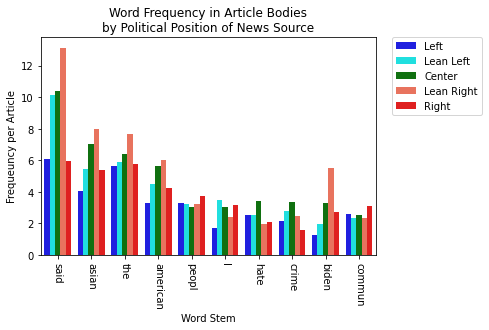

In [ ]:
plot_word_usage_by_pos(melt_body_df, title_ = "Word Frequency in Article Bodies\nby Political Position of News Source")

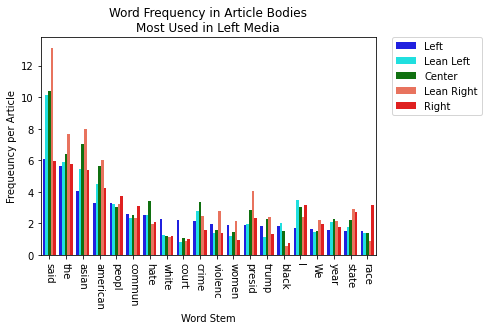

In [ ]:
plot_word_usage_by_pos(melt_body_df, political_position="left", title_ = "Word Frequency in Article Bodies\nMost Used in Left Media", num_highest_used = 20)

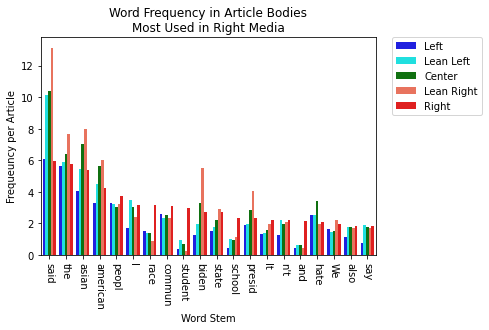

In [ ]:
plot_word_usage_by_pos(melt_body_df, political_position="right", title_ = "Word Frequency in Article Bodies\nMost Used in Right Media", num_highest_used = 20)

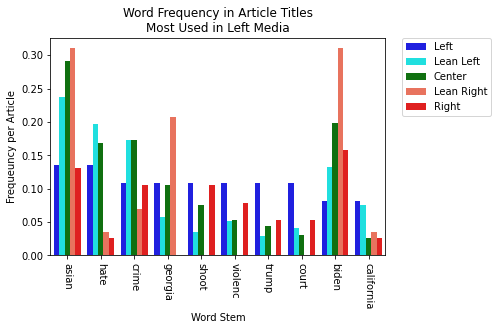

In [ ]:
plot_word_usage_by_pos(melt_title_df, political_position="left", title_ = "Word Frequency in Article Titles\nMost Used in Left Media")

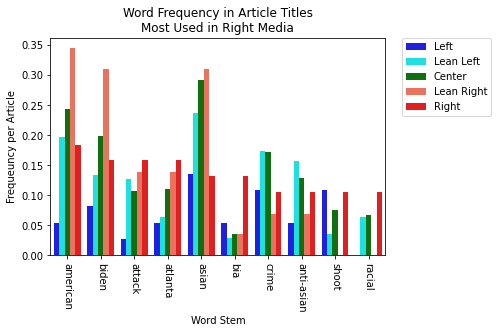

In [ ]:
plot_word_usage_by_pos(melt_title_df, political_position="right", title_ = "Word Frequency in Article Titles\nMost Used in Right Media")

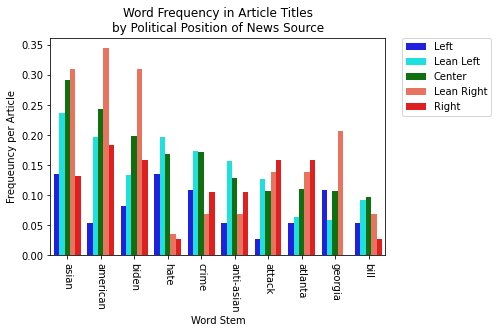

In [ ]:
plot_word_usage_by_pos(melt_title_df)

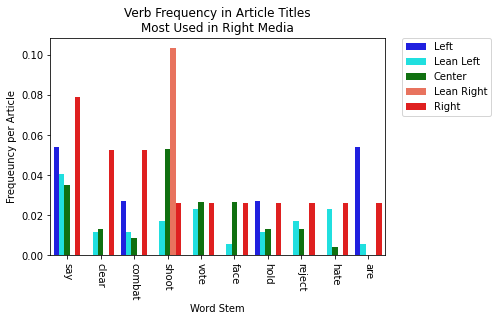

In [ ]:
plot_word_usage_by_pos(melt_title_df, part_of_speech = "VB", political_position="right", title_ = "Verb Frequency in Article Titles\nMost Used in Right Media")

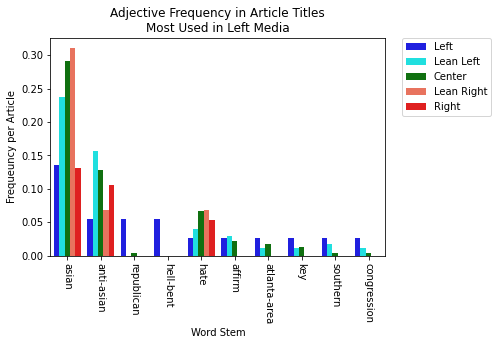

In [ ]:
plot_word_usage_by_pos(melt_title_df, part_of_speech = "JJ", political_position="left", title_ = "Adjective Frequency in Article Titles\nMost Used in Left Media")

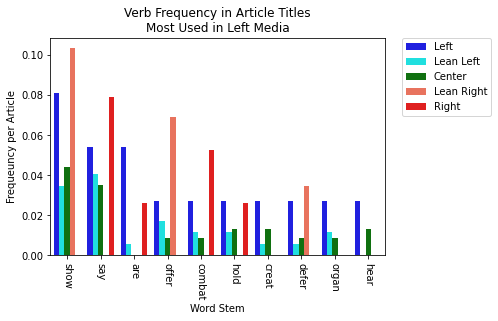

In [ ]:
plot_word_usage_by_pos(melt_title_df, part_of_speech = "vb", political_position="left", title_ = "Verb Frequency in Article Titles\nMost Used in Left Media")

In [ ]:
title_stem_df.to_csv("/content/gdrive/MyDrive/AAPI_text_analysis_project/title_stem_dataframe.csv", index = False)

In [ ]:
body_stem_df.to_csv("/content/gdrive/MyDrive/AAPI_text_analysis_project/body_stem_dataframe.csv", index = False)

# 7/4/2021 Cells (Topic and Category Analysis)

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import json, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [ ]:
with open("/content/gdrive/MyDrive/AAPI_text_analysis_project/unique_article_categories.json", "r") as cat_json:
  unique_categories = json.load(cat_json)

In [ ]:
with open("/content/gdrive/MyDrive/AAPI_text_analysis_project/unique_article_concepts.json", "r") as concept_json:
  unique_concepts = json.load(concept_json)

In [ ]:
with open('/content/gdrive/MyDrive/AAPI_text_analysis_project/Asian_American_Articles_in_last_year.json', 'r') as aapi_json:
  articles = json.load(aapi_json)

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/AAPI_text_analysis_project/full_df_7_4_2021.csv")
df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,location,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_JJ,title_NNS,title_VBP,title_NN,title_NNP,title_:,title_VBZ,title_JJR,title_MD,title_VBN,title_VB,title_VBD,title_NNPS,title_VBG,title_IN,"title_,",title_POS,title_'',title_DT,...,"title_,_per_word",title_POS_per_word,title_''_per_word,title_DT_per_word,title_CD_per_word,title_WRB_per_word,title_RB_per_word,title_PRP_per_word,title_PRP$_per_word,title_RP_per_word,title_PDT_per_word,title_TO_per_word,title_``_per_word,title_FW_per_word,title_CC_per_word,title_._per_word,title_WP_per_word,title_JJS_per_word,title_(_per_word,title_)_per_word,title_$_per_word,title_UH_per_word,title_RBS_per_word,position_adjusted,nltk_body_sentiment_compound,nltk_title_sentiment_compound,nltk_body_sentiment_neg,nltk_title_sentiment_neg,nltk_body_sentiment_neu,nltk_title_sentiment_neu,nltk_body_sentiment_pos,nltk_title_sentiment_pos,title_negation,body_negation,title_negation_per_word,body_negation_per_word,title_stem,title_stem_pos,body_stem,body_stem_pos
0,-0.168627,38,6601183495,Racial tensions simmer as Southern Baptists ho...,"NASHVILLE, Tenn. -- Race-related tensions with...",abcnews.go.com,ABC News,171,615,150359,True,2021-06-11,"Nashville, Tennessee",9,1454,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Racial"", ""tensions"", ""simmer"", ""as"", ""Southe...","[""NASHVILLE"", "","", ""Tenn."", ""--"", ""Race-relate...",3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,0.9906,-0.4019,0.075,0.252,0.824,0.748,0.100,0.0,0,140,0.0,0.096286,"[""racial"", ""tension"", ""simmer"", ""southern"", ""b...","[""JJ"", ""NN"", ""VB"", ""JJ"", ""NN"", ""VB"", ""JJ"", ""NN""]","[""nashvil"", ""tenn."", ""race-rel"", ""tension"", ""w...","[""NN"", ""NN"", ""JJ"", ""NN"", ""IN"", ""JJ"", ""NN"", ""NN..."
1,-0.498039,64,6589548036,Asian American and Pacific Islander hate: Grap...,The U.S. has seen a disturbing surge in hate i...,abcnews.go.com,ABC News,171,615,150359,True,2021-06-03,United States,13,156,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Asian"", ""American"", ""and"", ""Pacific"", ""Islan...","[""The"", ""U.S."", ""has"", ""seen"", ""a"", ""disturbin...",1,2,0,1,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9833,-0.7184,0.201,0.375,0.778,0.625,0.021,0.0,0,0,0.0,0.000000,"[""asian"", ""american"", ""pacif"", ""island"", ""hate...","[""JJ"", ""NN"", ""NN"", ""NN"", ""NN"", ""NN"", ""VB"", ""NN...","[""the"", ""u.s."", ""seen"", ""disturb"", ""surg"", ""ha...","[""DT"", ""NN"", ""VB"", ""VB"", ""NN"", ""JJ"", ""NN"", ""JJ..."
2,0.003922,118,6578408470,AP-NORC poll: More Americans believe anti-Asia...,WASHINGTON -- A majority of Americans across r...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-26,Washington (state),9,1091,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""AP-NORC"", ""poll"", "":"", ""More"", ""Americans"", ...","[""WASHINGTON"", ""--"", ""A"", ""majority"", ""of"", ""A...",2,1,1,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9982,-0.5719,0.141,0.346,0.795,0.654,0.065,0.0,0,91,0.0,0.083410,"[""ap-norc"", ""poll"", ""more"", ""american"", ""belie...","[""JJ"", ""NN"", ""JJ"", ""NN"", ""VB"", ""JJ"", ""NN"", ""NN""]","[""washington"", ""A"", ""major"", ""american"", ""acro...","[""NN"", ""DT"", ""NN"", ""NN"", ""IN"", ""JJ"", ""JJ"", ""NN..."
3,-0.325490,39,6573140750,Floyd legislation reveals divide in police-ref...,NEW YORK -- Monifa Bandele became a community ...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-22,New York City,7,1409,355101,/news-source/abc-news-media-bias,

In [ ]:
articles[0]['uri']

'6601183495'

In [ ]:
# Add Concepts and Categories to Main DataFrame
all_concepts = ["" for i in range(df.shape[0])]
all_cat_uri = ["" for i in range(df.shape[0])]
success_count = 0
for i, article in enumerate(articles):
  if i % 50 == 0: print(i);
  if int(article['uri']) not in df['uri'].values:
    continue
  success_count += 1
  curr_index = df[df['uri'] == int(article['uri'])].index.values[0]
  all_concepts[curr_index] = json.dumps(article['concepts'])
  all_cat_uri[curr_index] = json.dumps(article['categories'])

print(f"Success Count: {success_count}")
df['categories'] = all_cat_uri
df['concepts'] = all_concepts
df.head()

0
50
100
150
200
250
300
350
400
450
500
Success Count: 503


,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,location,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_JJ,title_NNS,title_VBP,title_NN,title_NNP,title_:,title_VBZ,title_JJR,title_MD,title_VBN,title_VB,title_VBD,title_NNPS,title_VBG,title_IN,"title_,",title_POS,title_'',title_DT,...,title_''_per_word,title_DT_per_word,title_CD_per_word,title_WRB_per_word,title_RB_per_word,title_PRP_per_word,title_PRP$_per_word,title_RP_per_word,title_PDT_per_word,title_TO_per_word,title_``_per_word,title_FW_per_word,title_CC_per_word,title_._per_word,title_WP_per_word,title_JJS_per_word,title_(_per_word,title_)_per_word,title_$_per_word,title_UH_per_word,title_RBS_per_word,position_adjusted,nltk_body_sentiment_compound,nltk_title_sentiment_compound,nltk_body_sentiment_neg,nltk_title_sentiment_neg,nltk_body_sentiment_neu,nltk_title_sentiment_neu,nltk_body_sentiment_pos,nltk_title_sentiment_pos,title_negation,body_negation,title_negation_per_word,body_negation_per_word,title_stem,title_stem_pos,body_stem,body_stem_pos,categories,concepts
0,-0.168627,38,6601183495,Racial tensions simmer as Southern Baptists ho...,"NASHVILLE, Tenn. -- Race-related tensions with...",abcnews.go.com,ABC News,171,615,150359,True,2021-06-11,"Nashville, Tennessee",9,1454,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Racial"", ""tensions"", ""simmer"", ""as"", ""Southe...","[""NASHVILLE"", "","", ""Tenn."", ""--"", ""Race-relate...",3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,0.9906,-0.4019,0.075,0.252,0.824,0.748,0.100,0.0,0,140,0.0,0.096286,"[""racial"", ""tension"", ""simmer"", ""southern"", ""b...","[""JJ"", ""NN"", ""VB"", ""JJ"", ""NN"", ""VB"", ""JJ"", ""NN""]","[""nashvil"", ""tenn."", ""race-rel"", ""tension"", ""w...","[""NN"", ""NN"", ""JJ"", ""NN"", ""IN"", ""JJ"", ""NN"", ""NN...","[{""uri"": ""dmoz/Society"", ""label"": ""dmoz/Societ...","[{""uri"": ""http://en.wikipedia.org/wiki/Black_c..."
1,-0.498039,64,6589548036,Asian American and Pacific Islander hate: Grap...,The U.S. has seen a disturbing surge in hate i...,abcnews.go.com,ABC News,171,615,150359,True,2021-06-03,United States,13,156,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Asian"", ""American"", ""and"", ""Pacific"", ""Islan...","[""The"", ""U.S."", ""has"", ""seen"", ""a"", ""disturbin...",1,2,0,1,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9833,-0.7184,0.201,0.375,0.778,0.625,0.021,0.0,0,0,0.0,0.000000,"[""asian"", ""american"", ""pacif"", ""island"", ""hate...","[""JJ"", ""NN"", ""NN"", ""NN"", ""NN"", ""NN"", ""VB"", ""NN...","[""the"", ""u.s."", ""seen"", ""disturb"", ""surg"", ""ha...","[""DT"", ""NN"", ""VB"", ""VB"", ""NN"", ""JJ"", ""NN"", ""JJ...","[{""uri"": ""dmoz/Society/Issues"", ""label"": ""dmoz...","[{""uri"": ""http://en.wikipedia.org/wiki/United_..."
2,0.003922,118,6578408470,AP-NORC poll: More Americans believe anti-Asia...,WASHINGTON -- A majority of Americans across r...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-26,Washington (state),9,1091,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""AP-NORC"", ""poll"", "":"", ""More"", ""Americans"", ...","[""WASHINGTON"", ""--"", ""A"", ""majority"", ""of"", ""A...",2,1,1,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9982,-0.5719,0.141,0.346,0.795,0.654,0.065,0.0,0,91,0.0,0.083410,"[""ap-norc"", ""poll"", ""more"", ""american"", ""belie...","[""JJ"", ""NN"", ""JJ"", ""NN"", ""VB"", ""JJ"", ""NN"", ""NN""]","[""washington"", ""A"", ""major"", ""american"", ""acro...","[""NN"", ""DT"", ""NN"", ""NN"", ""IN"", ""JJ"", ""JJ"", ""NN...","[{""uri"": ""news/Politics"", ""label"": ""news/Polit..

In [ ]:
df.shape

(503, 204)

In [ ]:
unique_categories[0]

'dmoz/Society'

In [ ]:
unique_concepts[0]

{'label': 'Black church',
 'score': 5,
 'type': 'person',
 'uri': 'http://en.wikipedia.org/wiki/Black_church'}

In [ ]:
# Initialize Empty Frequency Dictionaries

category_position_dict = dict((a, {
    'Left': 0,
    'Lean Left': 0,
    'Center': 0,
    'Lean Right': 0,
    'Right': 0,
    'category': a
}) for a in unique_categories)
concept_position_dict = dict((a['label'], {
    'Left': 0,
    'Lean Left': 0,
    'Center': 0,
    'Lean Right': 0,
    'Right': 0,
    'concept_data': json.dumps(a),
    'concept_label': a['label']
}) for a in unique_concepts)

In [ ]:
unique_categories[:5]

['dmoz/Society',
 'news/Politics',
 'dmoz/Society/Religion_and_Spirituality',
 'dmoz/Society/Issues/Race-Ethnic-Religious_Relations',
 'dmoz/Society/Religion_and_Spirituality/Christianity']

In [ ]:
concept_position_dict['Black church']

{'Center': 0,
 'Lean Left': 0,
 'Lean Right': 0,
 'Left': 0,
 'Right': 0,
 'concept_data': '{"label": "Black church", "score": 5, "type": "person", "uri": "http://en.wikipedia.org/wiki/Black_church"}',
 'concept_label': 'Black church'}

In [ ]:
df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,location,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_JJ,title_NNS,title_VBP,title_NN,title_NNP,title_:,title_VBZ,title_JJR,title_MD,title_VBN,title_VB,title_VBD,title_NNPS,title_VBG,title_IN,"title_,",title_POS,title_'',title_DT,...,title_''_per_word,title_DT_per_word,title_CD_per_word,title_WRB_per_word,title_RB_per_word,title_PRP_per_word,title_PRP$_per_word,title_RP_per_word,title_PDT_per_word,title_TO_per_word,title_``_per_word,title_FW_per_word,title_CC_per_word,title_._per_word,title_WP_per_word,title_JJS_per_word,title_(_per_word,title_)_per_word,title_$_per_word,title_UH_per_word,title_RBS_per_word,position_adjusted,nltk_body_sentiment_compound,nltk_title_sentiment_compound,nltk_body_sentiment_neg,nltk_title_sentiment_neg,nltk_body_sentiment_neu,nltk_title_sentiment_neu,nltk_body_sentiment_pos,nltk_title_sentiment_pos,title_negation,body_negation,title_negation_per_word,body_negation_per_word,title_stem,title_stem_pos,body_stem,body_stem_pos,categories,concepts
0,-0.168627,38,6601183495,Racial tensions simmer as Southern Baptists ho...,"NASHVILLE, Tenn. -- Race-related tensions with...",abcnews.go.com,ABC News,171,615,150359,True,2021-06-11,"Nashville, Tennessee",9,1454,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Racial"", ""tensions"", ""simmer"", ""as"", ""Southe...","[""NASHVILLE"", "","", ""Tenn."", ""--"", ""Race-relate...",3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,0.9906,-0.4019,0.075,0.252,0.824,0.748,0.100,0.0,0,140,0.0,0.096286,"[""racial"", ""tension"", ""simmer"", ""southern"", ""b...","[""JJ"", ""NN"", ""VB"", ""JJ"", ""NN"", ""VB"", ""JJ"", ""NN""]","[""nashvil"", ""tenn."", ""race-rel"", ""tension"", ""w...","[""NN"", ""NN"", ""JJ"", ""NN"", ""IN"", ""JJ"", ""NN"", ""NN...","[{""uri"": ""dmoz/Society"", ""label"": ""dmoz/Societ...","[{""uri"": ""http://en.wikipedia.org/wiki/Black_c..."
1,-0.498039,64,6589548036,Asian American and Pacific Islander hate: Grap...,The U.S. has seen a disturbing surge in hate i...,abcnews.go.com,ABC News,171,615,150359,True,2021-06-03,United States,13,156,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Asian"", ""American"", ""and"", ""Pacific"", ""Islan...","[""The"", ""U.S."", ""has"", ""seen"", ""a"", ""disturbin...",1,2,0,1,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9833,-0.7184,0.201,0.375,0.778,0.625,0.021,0.0,0,0,0.0,0.000000,"[""asian"", ""american"", ""pacif"", ""island"", ""hate...","[""JJ"", ""NN"", ""NN"", ""NN"", ""NN"", ""NN"", ""VB"", ""NN...","[""the"", ""u.s."", ""seen"", ""disturb"", ""surg"", ""ha...","[""DT"", ""NN"", ""VB"", ""VB"", ""NN"", ""JJ"", ""NN"", ""JJ...","[{""uri"": ""dmoz/Society/Issues"", ""label"": ""dmoz...","[{""uri"": ""http://en.wikipedia.org/wiki/United_..."
2,0.003922,118,6578408470,AP-NORC poll: More Americans believe anti-Asia...,WASHINGTON -- A majority of Americans across r...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-26,Washington (state),9,1091,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""AP-NORC"", ""poll"", "":"", ""More"", ""Americans"", ...","[""WASHINGTON"", ""--"", ""A"", ""majority"", ""of"", ""A...",2,1,1,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9982,-0.5719,0.141,0.346,0.795,0.654,0.065,0.0,0,91,0.0,0.083410,"[""ap-norc"", ""poll"", ""more"", ""american"", ""belie...","[""JJ"", ""NN"", ""JJ"", ""NN"", ""VB"", ""JJ"", ""NN"", ""NN""]","[""washington"", ""A"", ""major"", ""american"", ""acro...","[""NN"", ""DT"", ""NN"", ""NN"", ""IN"", ""JJ"", ""JJ"", ""NN...","[{""uri"": ""news/Politics"", ""label"": ""news/Polit..

In [ ]:

for i, row in df.iterrows():

  if i % 50 == 0: print(i);

  for cat, con in zip(json.loads(row['categories']), json.loads(row['concepts'])):

    concept_position_dict[con['label']['eng']][row['source_position']] += 1
    category_position_dict[cat['label'].replace(' ', '_')][row['source_position']] += 1


0
50
100
150
200
250
300
350
400
450
500


In [ ]:
concept_df = pd.DataFrame(concept_position_dict.values())
concept_df.head()

,Left,Lean Left,Center,Lean Right,Right,concept_data,concept_label
0,1,4,1,0,0,"{""label"": ""Black church"", ""score"": 5, ""type"": ...",Black church
1,1,3,1,0,0,"{""label"": ""The Reverend"", ""score"": 5, ""type"": ...",The Reverend
2,1,3,2,0,0,"{""label"": ""Christian denomination"", ""score"": 5...",Christian denomination
3,1,3,2,0,0,"{""label"": ""Southern Baptist Convention"", ""scor...",Southern Baptist Convention
4,0,5,1,1,1,"{""label"": ""Critical race theory"", ""score"": 5, ...",Critical race theory


In [ ]:
category_df = pd.DataFrame(category_position_dict.values())
category_df.head()

,Left,Lean Left,Center,Lean Right,Right,category
0,1,5,2,0,0,dmoz/Society
1,22,116,147,21,23,news/Politics
2,1,4,2,0,0,dmoz/Society/Religion_and_Spirituality
3,37,173,226,29,38,dmoz/Society/Issues/Race-Ethnic-Religious_Rela...
4,1,4,2,0,0,dmoz/Society/Religion_and_Spirituality/Christi...


In [ ]:
concept_df['usage_sum'] = concept_df.drop(["concept_data", 'concept_label'], axis = 1).sum(axis = 1)
concept_df.head()

,Left,Lean Left,Center,Lean Right,Right,concept_data,concept_label,usage_sum
0,1,4,1,0,0,"{""label"": ""Black church"", ""score"": 5, ""type"": ...",Black church,6
1,1,3,1,0,0,"{""label"": ""The Reverend"", ""score"": 5, ""type"": ...",The Reverend,5
2,1,3,2,0,0,"{""label"": ""Christian denomination"", ""score"": 5...",Christian denomination,6
3,1,3,2,0,0,"{""label"": ""Southern Baptist Convention"", ""scor...",Southern Baptist Convention,6
4,0,5,1,1,1,"{""label"": ""Critical race theory"", ""score"": 5, ...",Critical race theory,8


In [ ]:
category_df['usage_sum'] = category_df.drop("category", axis = 1).sum(axis = 1)
category_df.head()

,Left,Lean Left,Center,Lean Right,Right,category,usage_sum
0,1,5,2,0,0,dmoz/Society,8
1,22,116,147,21,23,news/Politics,329
2,1,4,2,0,0,dmoz/Society/Religion_and_Spirituality,7
3,37,173,226,29,38,dmoz/Society/Issues/Race-Ethnic-Religious_Rela...,503
4,1,4,2,0,0,dmoz/Society/Religion_and_Spirituality/Christi...,7


In [ ]:
concept_df['0_per_article_left'] = concept_df['Left'] / df[df['source_position'] == "Left"].shape[0]
concept_df['1_per_article_lean_left'] = concept_df['Lean Left'] / df[df['source_position'] == "Lean Left"].shape[0]
concept_df['4_per_article_right'] = concept_df['Right'] / df[df['source_position'] == "Right"].shape[0]
concept_df['3_per_article_lean_right'] = concept_df['Lean Right'] / df[df['source_position'] == "Lean Right"].shape[0]
concept_df['2_per_article_center'] = concept_df['Center'] / df[df['source_position'] == "Center"].shape[0]

In [ ]:
category_df['0_per_article_left'] = category_df['Left'] / df[df['source_position'] == "Left"].shape[0]
category_df['1_per_article_lean_left'] = category_df['Lean Left'] / df[df['source_position'] == "Lean Left"].shape[0]
category_df['4_per_article_right'] = category_df['Right'] / df[df['source_position'] == "Right"].shape[0]
category_df['3_per_article_lean_right'] = category_df['Lean Right'] / df[df['source_position'] == "Lean Right"].shape[0]
category_df['2_per_article_center'] = category_df['Center'] / df[df['source_position'] == "Center"].shape[0]

In [ ]:
for col in ["0_per_article_left","1_per_article_lean_left","4_per_article_right","3_per_article_lean_right","2_per_article_center"]:
  concept_df[f"{col}_copy"] = concept_df[col]
  category_df[f"{col}_copy"] = category_df[col]

In [ ]:
melt_concept_df = pd.melt(concept_df, id_vars = ["concept_data",
                                                  "usage_sum",
                                                  "concept_label",
                                                  "0_per_article_left_copy",
                                                  "1_per_article_lean_left_copy",
                                                  "4_per_article_right_copy",
                                                  "3_per_article_lean_right_copy",
                                                  "2_per_article_center_copy"
                                                  ],
                        value_vars = ["0_per_article_left",
                                      "1_per_article_lean_left",
                                      "4_per_article_right",
                                      "3_per_article_lean_right",
                                      "2_per_article_center"],
                  var_name = "position",
                  value_name = "usage_per_article")
melt_concept_df.head()

,concept_data,usage_sum,concept_label,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy,position,usage_per_article
0,"{""label"": ""Black church"", ""score"": 5, ""type"": ...",6,Black church,0.027027,0.023121,0.000000,0.000000,0.004425,0_per_article_left,0.027027
1,"{""label"": ""The Reverend"", ""score"": 5, ""type"": ...",5,The Reverend,0.027027,0.017341,0.000000,0.000000,0.004425,0_per_article_left,0.027027
2,"{""label"": ""Christian denomination"", ""score"": 5...",6,Christian denomination,0.027027,0.017341,0.000000,0.000000,0.008850,0_per_article_left,0.027027
3,"{""label"": ""Southern Baptist Convention"", ""scor...",6,Southern Baptist Convention,0.027027,0.017341,0.000000,0.000000,0.008850,0_per_article_left,0.027027
4,"{""label"": ""Critical race theory"", ""score"": 5, ...",8,Critical race theory,0.000000,0.028902,0.026316,0.034483,0.004425,0_per_article_left,0.000000


In [ ]:
melt_category_df = pd.melt(category_df, id_vars = ["category",
                                                  "usage_sum",
                                                  "0_per_article_left_copy",
                                                  "1_per_article_lean_left_copy",
                                                  "4_per_article_right_copy",
                                                  "3_per_article_lean_right_copy",
                                                  "2_per_article_center_copy"
                                                  ],
                        value_vars = ["0_per_article_left",
                                      "1_per_article_lean_left",
                                      "4_per_article_right",
                                      "3_per_article_lean_right",
                                      "2_per_article_center"],
                  var_name = "position",
                  value_name = "usage_per_article")
melt_category_df.head()

,category,usage_sum,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy,position,usage_per_article
0,dmoz/Society,8,0.027027,0.028902,0.000000,0.000000,0.008850,0_per_article_left,0.027027
1,news/Politics,329,0.594595,0.670520,0.605263,0.724138,0.650442,0_per_article_left,0.594595
2,dmoz/Society/Religion_and_Spirituality,7,0.027027,0.023121,0.000000,0.000000,0.008850,0_per_article_left,0.027027
3,dmoz/Society/Issues/Race-Ethnic-Religious_Rela...,503,1.000000,1.000000,1.000000,1.000000,1.000000,0_per_article_left,1.000000
4,dmoz/Society/Religion_and_Spirituality/Christi...,7,0.027027,0.023121,0.000000,0.000000,0.008850,0_per_article_left,0.027027


In [ ]:
def plot_usage_by_pos(melt_df, kind, political_position="usage_sum", title_ = "Frequency per Article\nby News Source Political Position", num_highest_used=10):
  to_sort = "usage_sum"
  if political_position.lower() == "left":
    to_sort = ["0_per_article_left_copy", "usage_sum"]
  if political_position.lower() == "lean_left":
    to_sort = ["1_per_article_lean_left_copy", "usage_sum"]
  if political_position.lower() == "center":
    to_sort = ["2_per_article_center_copy", "usage_sum"]
  if political_position.lower() == "lean_right":
    to_sort = ["3_per_article_lean_right_copy", "usage_sum"]
  if political_position.lower() == "right":
    to_sort = ["4_per_article_right_copy", "usage_sum"]


  filt_data = melt_df.sort_values(to_sort, ascending = False)

  top_kind = filt_data.groupby(kind).sum().sort_values(to_sort, ascending = False).index.values[:num_highest_used]

  filtered_data = []

  adjusted_kind = []

  for k in top_kind:
    filtered_data.extend(filt_data[filt_data[kind] == k].values.tolist())
    if kind == "category":
      adjusted_kind.extend([k.split('/')[-1]]*filt_data[filt_data[kind] == k].shape[0])
  
  filtered_df = pd.DataFrame(filtered_data, columns = filt_data.columns).sort_values(to_sort, ascending = False)

  if kind == "category":
    filtered_df[kind] = adjusted_kind

  sns.barplot(data = filtered_df, x = kind, y = "usage_per_article", hue = "position", hue_order = ["0_per_article_left",
                                                                "1_per_article_lean_left",
                                                                "2_per_article_center",
                                                                "3_per_article_lean_right",
                                                                "4_per_article_right"],
                       palette = ["blue", "cyan", "green", 'tomato', 'red'], ci = None)
  plt.xticks(rotation = -90)

  ax = plt.gca()

  handles, labels = ax.get_legend_handles_labels()

  new_handles = [h for h, l in sorted(zip(handles, labels), key = lambda x: x[1])]

  ax.legend(new_handles, ["Left", "Lean Left", "Center", "Lean Right", "Right"], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

  
  plt.title(title_)

  plt.xlabel(kind.capitalize())

  plt.ylabel("Frequeuncy per Article")

  plt.show()


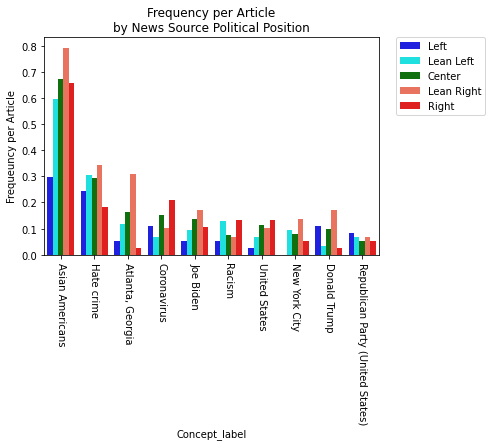

In [ ]:
plot_usage_by_pos(melt_concept_df, "concept_label")

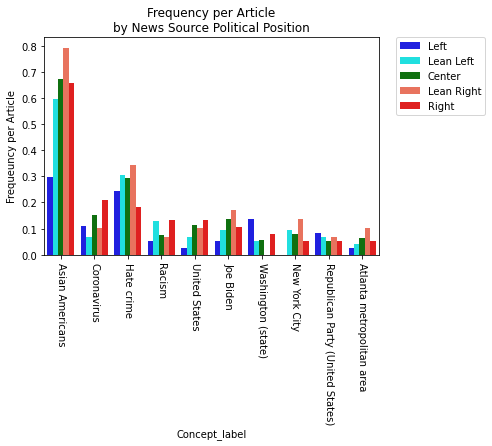

In [ ]:
plot_usage_by_pos(melt_concept_df, "concept_label", political_position="right")

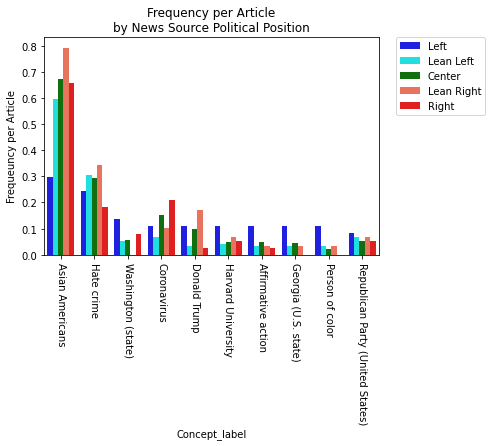

In [ ]:
plot_usage_by_pos(melt_concept_df, "concept_label", political_position="left")

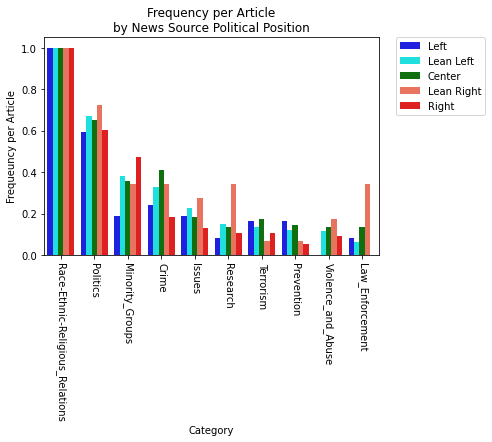

In [ ]:
plot_usage_by_pos(melt_category_df, "category")

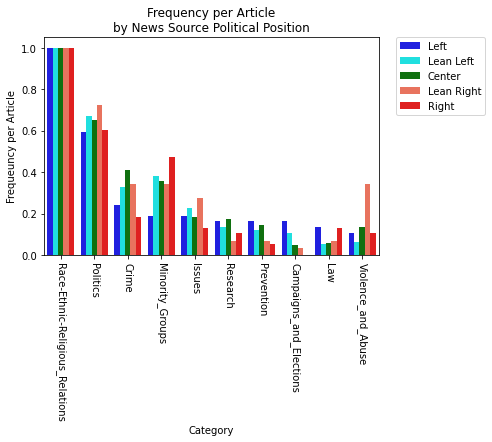

In [ ]:
plot_usage_by_pos(melt_category_df, "category", political_position = "left")

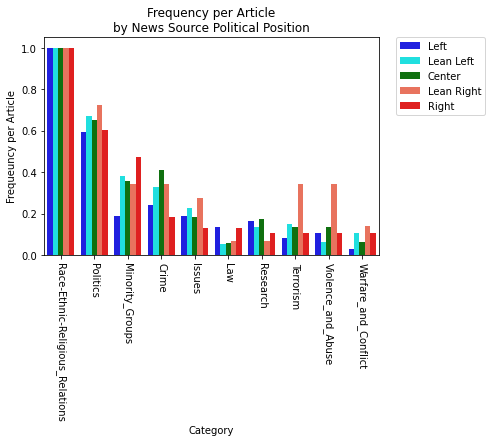

In [ ]:
plot_usage_by_pos(melt_category_df, "category", political_position = "right")

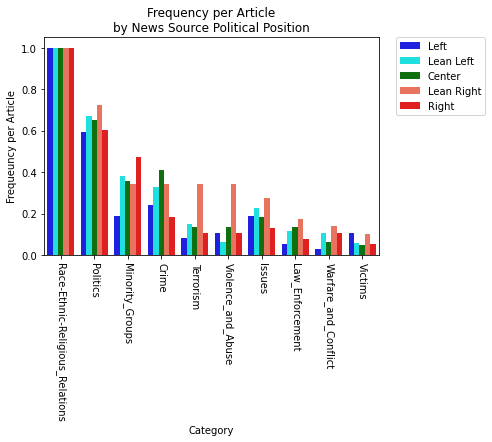

In [ ]:
plot_usage_by_pos(melt_category_df, "category", political_position = "lean_right")

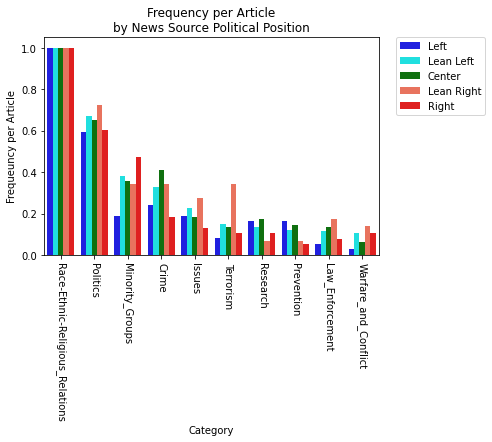

In [ ]:
plot_usage_by_pos(melt_category_df, "category", political_position = "lean_left")

In [ ]:
concept_df.to_csv("/content/gdrive/MyDrive/AAPI_text_analysis_project/concept_dataframe.csv", index = False)

In [ ]:
category_df.to_csv("/content/gdrive/MyDrive/AAPI_text_analysis_project/category_dataframe.csv", index = False)

In [ ]:
df.shape

(503, 204)

In [ ]:
df.to_csv("/content/gdrive/MyDrive/AAPI_text_analysis_project/full_df_7_5_2021.csv", index = False)

# 7/6/2021 Cells, Supplement Analysis Word Frequency Percentage (percentage of word usage out of all words used)

## Setup

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/AAPI_text_analysis_project/full_df_7_5_2021.csv")

In [ ]:
title_stem_df_2 = pd.read_csv("/content/gdrive/MyDrive/AAPI_text_analysis_project/title_stem_dataframe.csv")

In [ ]:
body_stem_df_2 = pd.read_csv("/content/gdrive/MyDrive/AAPI_text_analysis_project/body_stem_dataframe.csv")

In [ ]:
def plot_word_usage_by_pos(melt_df, part_of_speech=None, political_position="usage_sum", title_ = "Word Frequency in Article Titles\nby Political Position of News Source", num_highest_used=10):
  to_sort = "usage_sum"
  if political_position.lower() == "left":
    to_sort = ["0_per_article_left_copy", "usage_sum"]
  if political_position.lower() == "lean_left":
    to_sort = ["1_per_article_lean_left_copy", "usage_sum"]
  if political_position.lower() == "center":
    to_sort = ["2_per_article_center_copy", "usage_sum"]
  if political_position.lower() == "lean_right":
    to_sort = ["3_per_article_lean_right_copy", "usage_sum"]
  if political_position.lower() == "right":
    to_sort = ["4_per_article_right_copy", "usage_sum"]


  filt_data = melt_df.sort_values(to_sort, ascending = False)

  if part_of_speech is not None:

    filt_data = melt_df[melt_df['pos'] == part_of_speech.upper()].sort_values(to_sort, ascending = False)  

  top_stems = filt_data.groupby(['stem', 'pos']).sum().sort_values(to_sort, ascending = False).index.values[:num_highest_used]

  filtered_data = []

  for stem, pos in top_stems:
    filtered_data.extend(filt_data[(filt_data['stem'] == stem) & (filt_data['pos'] == pos)].values.tolist())

  filtered_df = pd.DataFrame(filtered_data, columns = filt_data.columns).sort_values(to_sort, ascending = False)

  sns.barplot(data = filtered_df, x = "stem", y = "usage_per_article", hue = "position", hue_order = ["0_per_article_left",
                                                                "1_per_article_lean_left",
                                                                "2_per_article_center",
                                                                "3_per_article_lean_right",
                                                                "4_per_article_right"],
                       palette = ["blue", "cyan", "green", 'tomato', 'red'], ci = None)
  plt.xticks(rotation = -90)

  ax = plt.gca()

  handles, labels = ax.get_legend_handles_labels()

  new_handles = [h for h, l in sorted(zip(handles, labels), key = lambda x: x[1])]

  ax.legend(new_handles, ["Left", "Lean Left", "Center", "Lean Right", "Right"], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

  
  plt.title(title_)

  plt.xlabel("Word Stem")

  plt.ylabel("Frequeuncy per Article")

  plt.show()


## Processing

In [ ]:
title_stem_df_2['0_per_article_left'] = title_stem_df_2['Left'] / df[df['source_position'] == "Left"]['title_length'].sum()
title_stem_df_2['1_per_article_lean_left'] = title_stem_df_2['Lean Left'] / df[df['source_position'] == "Lean Left"]['title_length'].sum()
title_stem_df_2['4_per_article_right'] = title_stem_df_2['Right'] / df[df['source_position'] == "Right"]['title_length'].sum()
title_stem_df_2['3_per_article_lean_right'] = title_stem_df_2['Lean Right'] / df[df['source_position'] == "Lean Right"]['title_length'].sum()
title_stem_df_2['2_per_article_center'] = title_stem_df_2['Center'] / df[df['source_position'] == "Center"]['title_length'].sum()


In [ ]:
body_stem_df_2['0_per_article_left'] = body_stem_df_2['Left'] / df[df['source_position'] == "Left"]['body_length'].sum()
body_stem_df_2['1_per_article_lean_left'] = body_stem_df_2['Lean Left'] / df[df['source_position'] == "Lean Left"]['body_length'].sum()
body_stem_df_2['4_per_article_right'] = body_stem_df_2['Right'] / df[df['source_position'] == "Right"]['body_length'].sum()
body_stem_df_2['3_per_article_lean_right'] = body_stem_df_2['Lean Right'] / df[df['source_position'] == "Lean Right"]['body_length'].sum()
body_stem_df_2['2_per_article_center'] = body_stem_df_2['Center'] / df[df['source_position'] == "Center"]['body_length'].sum()


In [ ]:
for col in ["0_per_article_left", "1_per_article_lean_left", "4_per_article_right", "3_per_article_lean_right", "2_per_article_center"]:
  title_stem_df_2[f"{col}_copy"] = title_stem_df_2[col]
  body_stem_df_2[f"{col}_copy"] = body_stem_df_2[col]


In [ ]:
melt_title_df_2 = pd.melt(title_stem_df_2, id_vars = ["stem",
                                                  "usage_sum",
                                                  "pos",
                                                  "0_per_article_left_copy",
                                                  "1_per_article_lean_left_copy",
                                                  "4_per_article_right_copy",
                                                  "3_per_article_lean_right_copy",
                                                  "2_per_article_center_copy"
                                                  ],
                        value_vars = ["0_per_article_left",
                                      "1_per_article_lean_left",
                                      "4_per_article_right",
                                      "3_per_article_lean_right",
                                      "2_per_article_center"],
                  var_name = "position",
                  value_name = "usage_per_article")
melt_title_df_2.head()

,stem,usage_sum,pos,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy,position,usage_per_article
0,racial,30,JJ,0.00000,0.005691,0.009685,0.0,0.005714,0_per_article_left,0.00000
1,tension,5,NN,0.00241,0.001552,0.000000,0.0,0.000381,0_per_article_left,0.00241
2,simmer,4,VB,0.00241,0.001035,0.000000,0.0,0.000381,0_per_article_left,0.00241
3,southern,5,JJ,0.00241,0.001552,0.000000,0.0,0.000381,0_per_article_left,0.00241
4,baptist,7,NN,0.00241,0.002069,0.000000,0.0,0.000762,0_per_article_left,0.00241


In [ ]:
melt_body_df_2 = pd.melt(body_stem_df_2, id_vars = ["stem",
                                                  "usage_sum",
                                                  "pos",
                                                  "0_per_article_left_copy",
                                                  "1_per_article_lean_left_copy",
                                                  "4_per_article_right_copy",
                                                  "3_per_article_lean_right_copy",
                                                  "2_per_article_center_copy"
                                                  ],
                        value_vars = ["0_per_article_left",
                                      "1_per_article_lean_left",
                                      "4_per_article_right",
                                      "3_per_article_lean_right",
                                      "2_per_article_center"],
                  var_name = "position",
                  value_name = "usage_per_article")
melt_body_df_2.head()

,stem,usage_sum,pos,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy,position,usage_per_article
0,nashvil,17,NN,0.000094,0.000061,0.000000,0.000000,0.000018,0_per_article_left,0.000094
1,tenn.,5,NN,0.000000,0.000025,0.000000,0.000000,0.000004,0_per_article_left,0.000000
2,race-rel,13,JJ,0.000063,0.000043,0.000027,0.000000,0.000013,0_per_article_left,0.000063
3,tension,51,NN,0.000094,0.000147,0.000054,0.000062,0.000088,0_per_article_left,0.000094
4,within,97,IN,0.000189,0.000209,0.000269,0.000124,0.000189,0_per_article_left,0.000189


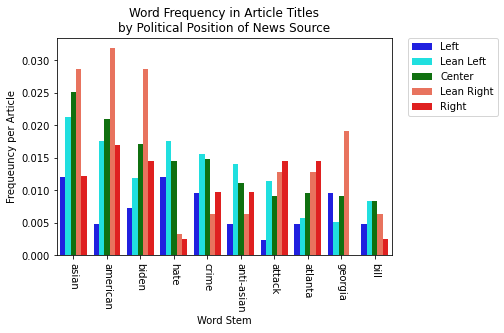

In [ ]:
plot_word_usage_by_pos(melt_title_df_2)

In [ ]:
title_stem_df_2.to_csv("/content/gdrive/MyDrive/AAPI_text_analysis_project/title_stem_df_by_word_use_percent.csv", index = False)

In [ ]:
body_stem_df_2.to_csv("/content/gdrive/MyDrive/AAPI_text_analysis_project/body_stem_df_by_word_use_percent.csv", index = False)

# 7/10/2021 Cells (Sentence Analysis Plot)

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [ ]:
main_path = "/content/gdrive/MyDrive/AAPI_text_analysis_project/"

In [ ]:
import os

In [ ]:
main_df = pd.read_csv(os.path.join(main_path, "full_df_7_5_2021.csv"))
main_df.head()

,sentiment,relevance,uri,title,body,source_uri,source_name,source_alexaCountryRank,source_alexaGlobalRank,source_importanceRank,source_valid_location,date,location,title_length,body_length,source_score,source_link,source_position,source_pos_int,title_doc,body_doc,title_JJ,title_NNS,title_VBP,title_NN,title_NNP,title_:,title_VBZ,title_JJR,title_MD,title_VBN,title_VB,title_VBD,title_NNPS,title_VBG,title_IN,"title_,",title_POS,title_'',title_DT,...,title_''_per_word,title_DT_per_word,title_CD_per_word,title_WRB_per_word,title_RB_per_word,title_PRP_per_word,title_PRP$_per_word,title_RP_per_word,title_PDT_per_word,title_TO_per_word,title_``_per_word,title_FW_per_word,title_CC_per_word,title_._per_word,title_WP_per_word,title_JJS_per_word,title_(_per_word,title_)_per_word,title_$_per_word,title_UH_per_word,title_RBS_per_word,position_adjusted,nltk_body_sentiment_compound,nltk_title_sentiment_compound,nltk_body_sentiment_neg,nltk_title_sentiment_neg,nltk_body_sentiment_neu,nltk_title_sentiment_neu,nltk_body_sentiment_pos,nltk_title_sentiment_pos,title_negation,body_negation,title_negation_per_word,body_negation_per_word,title_stem,title_stem_pos,body_stem,body_stem_pos,categories,concepts
0,-0.168627,38,6601183495,Racial tensions simmer as Southern Baptists ho...,"NASHVILLE, Tenn. -- Race-related tensions with...",abcnews.go.com,ABC News,171,615,150359,True,2021-06-11,"Nashville, Tennessee",9,1454,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Racial"", ""tensions"", ""simmer"", ""as"", ""Southe...","[""NASHVILLE"", "","", ""Tenn."", ""--"", ""Race-relate...",3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,0.9906,-0.4019,0.075,0.252,0.824,0.748,0.100,0.0,0,140,0.0,0.096286,"[""racial"", ""tension"", ""simmer"", ""southern"", ""b...","[""JJ"", ""NN"", ""VB"", ""JJ"", ""NN"", ""VB"", ""JJ"", ""NN""]","[""nashvil"", ""tenn."", ""race-rel"", ""tension"", ""w...","[""NN"", ""NN"", ""JJ"", ""NN"", ""IN"", ""JJ"", ""NN"", ""NN...","[{""uri"": ""dmoz/Society"", ""label"": ""dmoz/Societ...","[{""uri"": ""http://en.wikipedia.org/wiki/Black_c..."
1,-0.498039,64,6589548036,Asian American and Pacific Islander hate: Grap...,The U.S. has seen a disturbing surge in hate i...,abcnews.go.com,ABC News,171,615,150359,True,2021-06-03,United States,13,156,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""Asian"", ""American"", ""and"", ""Pacific"", ""Islan...","[""The"", ""U.S."", ""has"", ""seen"", ""a"", ""disturbin...",1,2,0,1,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9833,-0.7184,0.201,0.375,0.778,0.625,0.021,0.0,0,0,0.0,0.000000,"[""asian"", ""american"", ""pacif"", ""island"", ""hate...","[""JJ"", ""NN"", ""NN"", ""NN"", ""NN"", ""NN"", ""VB"", ""NN...","[""the"", ""u.s."", ""seen"", ""disturb"", ""surg"", ""ha...","[""DT"", ""NN"", ""VB"", ""VB"", ""NN"", ""JJ"", ""NN"", ""JJ...","[{""uri"": ""dmoz/Society/Issues"", ""label"": ""dmoz...","[{""uri"": ""http://en.wikipedia.org/wiki/United_..."
2,0.003922,118,6578408470,AP-NORC poll: More Americans believe anti-Asia...,WASHINGTON -- A majority of Americans across r...,abcnews.go.com,ABC News,171,615,150359,True,2021-05-26,Washington (state),9,1091,355101,/news-source/abc-news-media-bias,Lean Left,0,"[""AP-NORC"", ""poll"", "":"", ""More"", ""Americans"", ...","[""WASHINGTON"", ""--"", ""A"", ""majority"", ""of"", ""A...",2,1,1,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left,-0.9982,-0.5719,0.141,0.346,0.795,0.654,0.065,0.0,0,91,0.0,0.083410,"[""ap-norc"", ""poll"", ""more"", ""american"", ""belie...","[""JJ"", ""NN"", ""JJ"", ""NN"", ""VB"", ""JJ"", ""NN"", ""NN""]","[""washington"", ""A"", ""major"", ""american"", ""acro...","[""NN"", ""DT"", ""NN"", ""NN"", ""IN"", ""JJ"", ""JJ"", ""NN...","[{""uri"": ""news/Politics"", ""label"": ""news/Polit..

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop_words = stopwords.words("english")

In [ ]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
sent_tokenize("hello world. I love to eat chicken wings")

['hello world.', 'I love to eat chicken wings']

In [ ]:
import json

In [ ]:
sent_lengths = []
for doc in main_df['body'].values:
  sent_lengths.append(len(sent_tokenize(doc)))
sent_max_length = max(sent_lengths)
sent_max_length

228

In [ ]:
list(zip(main_df['source_position'].value_counts().index.values, main_df['source_position'].value_counts().values))

[('Center', 226),
 ('Lean Left', 173),
 ('Right', 38),
 ('Left', 37),
 ('Lean Right', 29)]

In [ ]:
body_sent_docs_by_position = dict((pos, np.zeros((num, sent_max_length, 3))) for pos, num in zip(main_df['source_position'].value_counts().index.values, main_df['source_position'].value_counts().values))

# dimensions: 1) number of docs, 2) number of sentences, 3) number of pos occurences [JJ, NN, VB]

pos_dict = {
    'JJ': 0,
    'NN': 1,
    'VB': 2
}

index_by_position = dict((pos, 0) for pos in ['Left', 'Lean Left', 'Center', 'Lean Right', 'Right'])

for i, row in main_df.iterrows():
  if i % 50 == 0: print(i);
  for j, sent in enumerate(sent_tokenize(row['body'])):
    for w, p in nltk.pos_tag(word_tokenize(sent)):
      if p[:2] in ['JJ', 'NN', 'VB']:
        body_sent_docs_by_position[row['source_position']][index_by_position[row['source_position']]][j][pos_dict[p[:2]]] += 1
    body_sent_docs_by_position[row['source_position']][index_by_position[row['source_position']]][j] = body_sent_docs_by_position[row['source_position']][index_by_position[row['source_position']]][j] / sum(body_sent_docs_by_position[row['source_position']][index_by_position[row['source_position']]][j])
  index_by_position[row['source_position']] += 1

index_by_position

0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


50
100
150
200
250
300
350
400
450
500


{'Center': 226, 'Lean Left': 173, 'Lean Right': 29, 'Left': 37, 'Right': 38}

In [ ]:
np.zeros((2,3,4)).mean(axis=0).shape

(3, 4)

In [ ]:
body_average_dfs_by_position = {}

for k in body_sent_docs_by_position.keys():
  
  body_average_dfs_by_position[k] = pd.DataFrame(body_sent_docs_by_position[k].mean(axis = 0), columns = ["adj", "noun", "verb"])
  body_average_dfs_by_position[k]['x'] = body_average_dfs_by_position[k].index

body_average_dfs_by_position['Left'].shape

(228, 4)

In [ ]:
body_relative_dfs_by_position = {}

for k in body_sent_docs_by_position.keys():
  temp_array = body_sent_docs_by_position[k].mean(axis = 0)

  body_relative_dfs_by_position[k] = pd.DataFrame(temp_array/temp_array.sum(axis = -1, keepdims = True), columns = ["adj", "noun", "verb"]).fillna(0)
  body_relative_dfs_by_position[k]['x'] = body_relative_dfs_by_position[k].index

body_relative_dfs_by_position['Left'].shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


(228, 4)

In [ ]:
body_average_dfs_by_position['Left'].head()

,adj,noun,verb,x
0,0.131892,0.679269,0.188839,0
1,0.133539,0.604918,0.261542,1
2,0.160023,0.577132,0.262845,2
3,0.130539,0.538913,0.303522,3
4,0.146705,0.524974,0.301294,4


In [ ]:
sns.set_theme()

## Average POS per SENTENCE

Text(0.5, 0, 'sentence number')

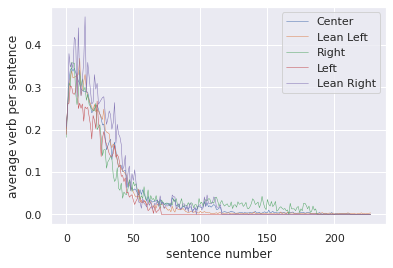

In [ ]:
for k in body_average_dfs_by_position.keys():
  sns.lineplot(data = body_average_dfs_by_position[k], x = "x", y = "verb", label = k, linewidth = .5)

plt.legend()
plt.ylabel("average verb per sentence")
plt.xlabel("sentence number")

Text(0.5, 0, 'sentence number')

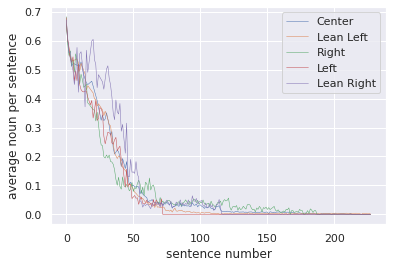

In [ ]:
for k in body_average_dfs_by_position.keys():
  sns.lineplot(data = body_average_dfs_by_position[k], x = "x", y = "noun", label = k, linewidth = .5)

plt.legend()
plt.ylabel("average noun per sentence")
plt.xlabel("sentence number")

Text(0.5, 0, 'sentence number')

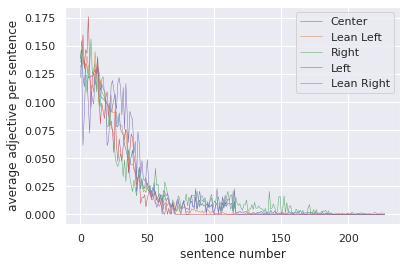

In [ ]:
for k in body_average_dfs_by_position.keys():
  sns.lineplot(data = body_average_dfs_by_position[k], x = "x", y = "adj", label = k, linewidth = .5)

plt.legend()
plt.ylabel("average adjective per sentence")
plt.xlabel("sentence number")

Text(0.5, 0, 'sentence number')

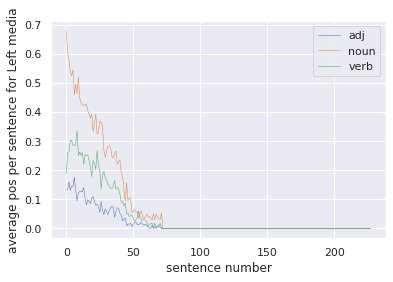

In [ ]:
for pos in ['adj', 'noun', 'verb']:
  sns.lineplot(data = body_average_dfs_by_position["Left"], x = "x", y = pos, label = pos, linewidth = .5)

plt.legend()
plt.ylabel("average pos per sentence for Left media")
plt.xlabel("sentence number")

Text(0.5, 0, 'sentence number')

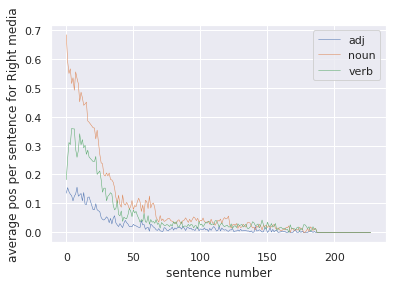

In [ ]:
for pos in ['adj', 'noun', 'verb']:
  sns.lineplot(data = body_average_dfs_by_position["Right"], x = "x", y = pos, label = pos, linewidth = .5)

plt.legend()
plt.ylabel("average pos per sentence for Right media")
plt.xlabel("sentence number")

Text(0.5, 0, 'sentence number')

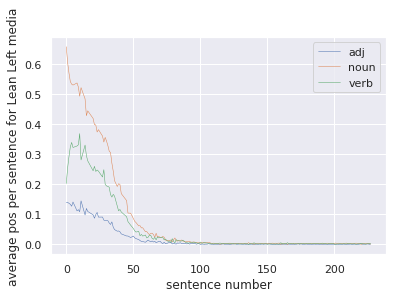

In [ ]:
for pos in ['adj', 'noun', 'verb']:
  sns.lineplot(data = body_average_dfs_by_position["Lean Left"], x = "x", y = pos, label = pos, linewidth = .5)

plt.legend()
plt.ylabel("average pos per sentence for Lean Left media")
plt.xlabel("sentence number")

Text(0.5, 0, 'sentence number')

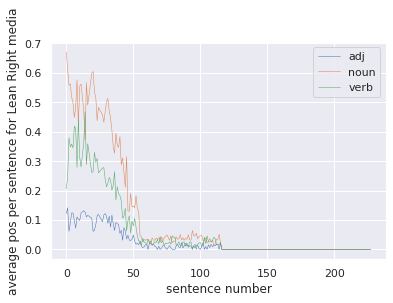

In [ ]:
for pos in ['adj', 'noun', 'verb']:
  sns.lineplot(data = body_average_dfs_by_position["Lean Right"], x = "x", y = pos, label = pos, linewidth = .5)

plt.legend()
plt.ylabel("average pos per sentence for Lean Right media")
plt.xlabel("sentence number")

Text(0.5, 0, 'sentence number')

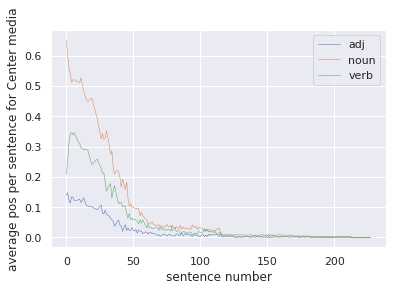

In [ ]:
for pos in ['adj', 'noun', 'verb']:
  sns.lineplot(data = body_average_dfs_by_position["Center"], x = "x", y = pos, label = pos, linewidth = .5)

plt.legend()
plt.ylabel("average pos per sentence for Center media")
plt.xlabel("sentence number")

## Relative POS in SENTENCE

Text(0.5, 0, 'sentence number')

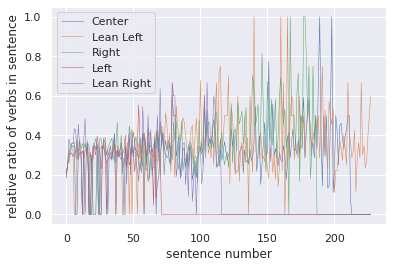

In [ ]:
for k in body_relative_dfs_by_position.keys():
  sns.lineplot(data = body_relative_dfs_by_position[k], x = "x", y = "verb", label = k, linewidth = .5)

plt.legend()
plt.ylabel("relative ratio of verbs in sentence")
plt.xlabel("sentence number")

Text(0.5, 0, 'sentence number')

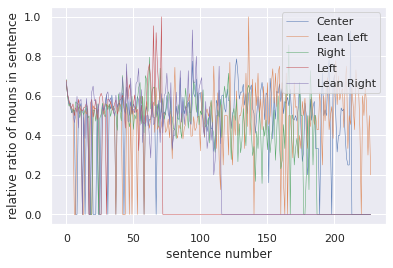

In [ ]:
for k in body_relative_dfs_by_position.keys():
  sns.lineplot(data = body_relative_dfs_by_position[k], x = "x", y = "noun", label = k, linewidth = .5)

plt.legend()
plt.ylabel("relative ratio of nouns in sentence")
plt.xlabel("sentence number")

Text(0.5, 0, 'sentence number')

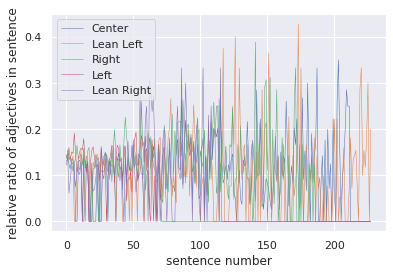

In [ ]:
for k in body_relative_dfs_by_position.keys():
  sns.lineplot(data = body_relative_dfs_by_position[k], x = "x", y = "adj", label = k, linewidth = .5)

plt.legend()
plt.ylabel("relative ratio of adjectives in sentence")
plt.xlabel("sentence number")

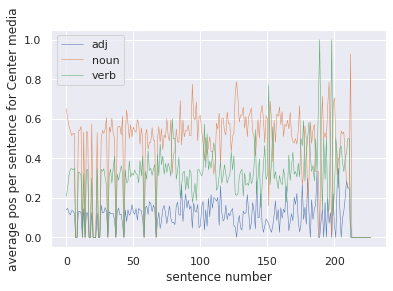

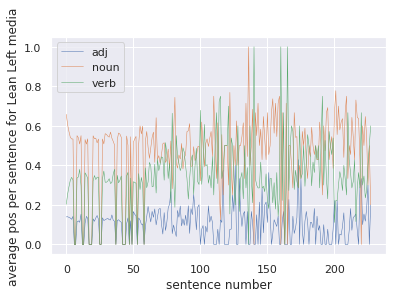

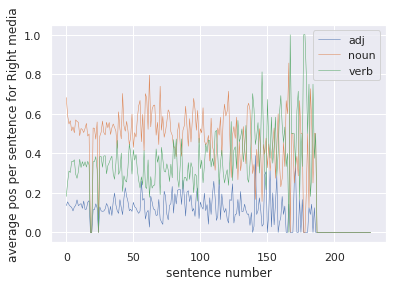

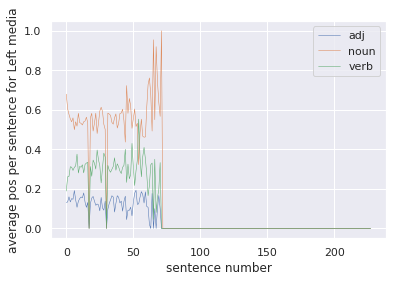

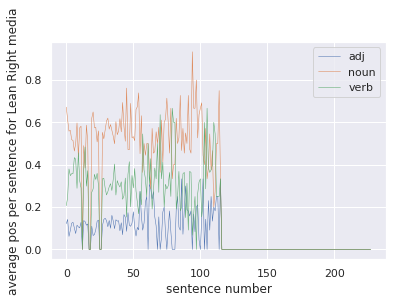

In [ ]:
for k in body_relative_dfs_by_position.keys():
  plt.figure()
  for pos in ['adj', 'noun', 'verb']:
    sns.lineplot(data = body_relative_dfs_by_position[k], x = "x", y = pos, label = pos, linewidth = .5)

  plt.legend()
  plt.ylabel(f"average pos per sentence for {k} media")
  plt.xlabel("sentence number")

# 7/12/2021 Cells (Concept Type Analysis)

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [ ]:
main_path = "/content/gdrive/MyDrive/AAPI_text_analysis_project"

In [ ]:
concept_df = pd.read_csv(os.path.join(main_path, "concept_dataframe.csv"))
concept_df.head()

,Left,Lean Left,Center,Lean Right,Right,concept_data,concept_label,usage_sum,0_per_article_left,1_per_article_lean_left,4_per_article_right,3_per_article_lean_right,2_per_article_center,0_per_article_left_copy,1_per_article_lean_left_copy,4_per_article_right_copy,3_per_article_lean_right_copy,2_per_article_center_copy
0,1,4,1,0,0,"{""label"": ""Black church"", ""score"": 5, ""type"": ...",Black church,6,0.027027,0.023121,0.000000,0.000000,0.004425,0.027027,0.023121,0.000000,0.000000,0.004425
1,1,3,1,0,0,"{""label"": ""The Reverend"", ""score"": 5, ""type"": ...",The Reverend,5,0.027027,0.017341,0.000000,0.000000,0.004425,0.027027,0.017341,0.000000,0.000000,0.004425
2,1,3,2,0,0,"{""label"": ""Christian denomination"", ""score"": 5...",Christian denomination,6,0.027027,0.017341,0.000000,0.000000,0.008850,0.027027,0.017341,0.000000,0.000000,0.008850
3,1,3,2,0,0,"{""label"": ""Southern Baptist Convention"", ""scor...",Southern Baptist Convention,6,0.027027,0.017341,0.000000,0.000000,0.008850,0.027027,0.017341,0.000000,0.000000,0.008850
4,0,5,1,1,1,"{""label"": ""Critical race theory"", ""score"": 5, ...",Critical race theory,8,0.000000,0.028902,0.026316,0.034483,0.004425,0.000000,0.028902,0.026316,0.034483,0.004425


In [ ]:
import json

In [ ]:
counter = 0
for i, row in concept_df.iterrows():
  concept_data = json.loads(row['concept_data'])
  if 'type' not in concept_data.keys():
    counter += 1
    print(counter)

In [ ]:
concept_type = []
for i, row in concept_df.iterrows():
  concept_data = json.loads(row['concept_data'])
  concept_type.append(concept_data['type'])

concept_df['concept_type'] = concept_type
concept_df['concept_type'].head()

0    person
1    person
2      wiki
3       org
4      wiki
Name: concept_type, dtype: object

In [ ]:
concept_df['concept_type'].value_counts()

wiki      1292
loc        577
person     486
org        349
Name: concept_type, dtype: int64

In [ ]:
type_dict = {}
for type_ in concept_df['concept_type'].unique():
  type_dict[type_] = concept_df[concept_df['concept_type'] == type_].copy()
type_dict.keys()

dict_keys(['person', 'wiki', 'org', 'loc'])

In [ ]:
type_data = {}
for type_ in type_dict.keys():
  type_data[type_] = type_dict[type_][['0_per_article_left', 	'1_per_article_lean_left', 	'4_per_article_right',	'3_per_article_lean_right', 	'2_per_article_center']].values.mean(axis = 0)


In [ ]:
type_df = pd.DataFrame(type_data, index = ['0_per_article_left', 	'1_per_article_lean_left', 	'2_per_article_center', '3_per_article_lean_right','4_per_article_right' 	])
type_df['index'] = type_df.index
type_df

,person,wiki,org,loc,index
0_per_article_left,0.001223,0.001945,0.002091,0.001827,0_per_article_left
1_per_article_lean_left,0.001451,0.001861,0.001275,0.001743,1_per_article_lean_left
2_per_article_center,0.001083,0.001691,0.001056,0.001824,2_per_article_center
3_per_article_lean_right,0.002483,0.001842,0.000198,0.002151,3_per_article_lean_right
4_per_article_right,0.001566,0.001846,0.001078,0.001687,4_per_article_right


[Text(0, 0, 'Left'),
 Text(0, 0, 'Lean Left'),
 Text(0, 0, 'Center'),
 Text(0, 0, 'Lean Right'),
 Text(0, 0, 'Right')]

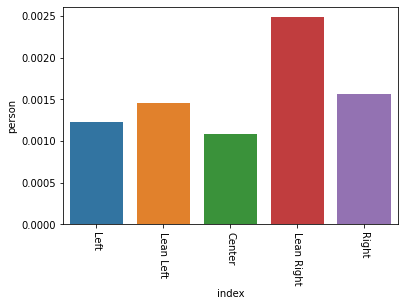

In [ ]:
sns.barplot(data = type_df, x = "index", y = "person")
plt.xticks(rotation = -90)

ax = plt.gca()

ax.set_xticklabels(["Left", "Lean Left", "Center", "Lean Right", "Right"])

[Text(0, 0, 'Left'),
 Text(0, 0, 'Lean Left'),
 Text(0, 0, 'Center'),
 Text(0, 0, 'Lean Right'),
 Text(0, 0, 'Right')]

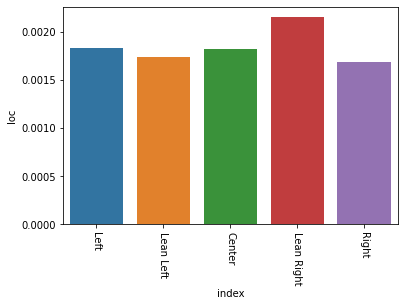

In [ ]:
sns.barplot(data = type_df, x = "index", y = "loc")
plt.xticks(rotation = -90)

ax = plt.gca()

ax.set_xticklabels(["Left", "Lean Left", "Center", "Lean Right", "Right"])

[Text(0, 0, 'Left'),
 Text(0, 0, 'Lean Left'),
 Text(0, 0, 'Center'),
 Text(0, 0, 'Lean Right'),
 Text(0, 0, 'Right')]

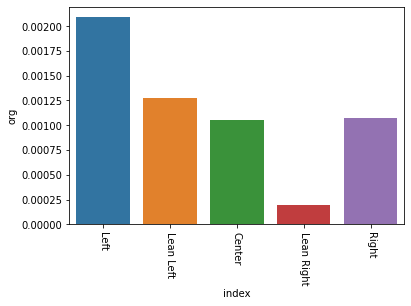

In [ ]:
sns.barplot(data = type_df, x = "index", y = "org")
plt.xticks(rotation = -90)

ax = plt.gca()

ax.set_xticklabels(["Left", "Lean Left", "Center", "Lean Right", "Right"])

[Text(0, 0, 'Left'),
 Text(0, 0, 'Lean Left'),
 Text(0, 0, 'Center'),
 Text(0, 0, 'Lean Right'),
 Text(0, 0, 'Right')]

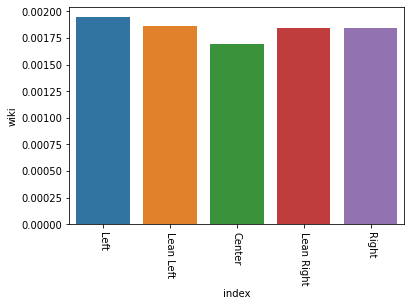

In [ ]:
sns.barplot(data = type_df, x = "index", y = "wiki")
plt.xticks(rotation = -90)

ax = plt.gca()

ax.set_xticklabels(["Left", "Lean Left", "Center", "Lean Right", "Right"])

In [ ]:
concept_df.to_csv(os.path.join(main_path, "concept_dataframe.csv"), index = False)

In [ ]:
type_df.to_csv(os.path.join(main_path, "concept_type_df.csv"), index = False)

# End of ETL, Move on to next step of Visualization, Observation, Analyses and Inferences